# Capstone project - HealthCare Fraud Detection

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
from cp_clean_helper import benef_new_feats, benef_label_encode, show_values,\
in_out_na_replace, in_new_feats, out_new_feats, inout_label_encode, code_count, chr_cond_cnt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading training and testing dataset:-

In [7]:
# Train datasets

train_y = pd.read_csv("/content/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("/content/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("/content/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("/content/Train_Outpatientdata-1542865627584.csv")

# Test datasets

test_provs = pd.read_csv("/content/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/content/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/content/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/content/Test_Outpatientdata-1542969243754.csv")

### # Dataset shapes:-

In [8]:
print('Shape of train_y data :',train_y.shape)
print('Shape of train_beneficiary data :',train_beneficiary.shape)
print('Shape of train_inpatient data :',train_inpatient.shape)
print('Shape of train_outpatient data :',train_outpatient.shape)

print('Shape of test_provs data :',test_provs.shape)
print('Shape of test_beneficiary data :',test_beneficiary.shape)
print('Shape of test_inpatient data :',test_inpatient.shape)
print('Shape of test_outpatient data :',test_outpatient.shape)

Shape of train_y data : (5410, 2)
Shape of train_beneficiary data : (138556, 25)
Shape of train_inpatient data : (40474, 30)
Shape of train_outpatient data : (517737, 27)
Shape of test_provs data : (1353, 1)
Shape of test_beneficiary data : (63968, 25)
Shape of test_inpatient data : (9551, 30)
Shape of test_outpatient data : (125841, 27)


### # Looking at first few rows for each:

- Train data

In [9]:
train_y.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [10]:
train_beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [11]:
train_inpatient.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [12]:
train_outpatient.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


- Test data

In [13]:
test_provs.head(5)

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [14]:
test_beneficiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [15]:
test_inpatient.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test_outpatient.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### # Investigating train and test provider info files:

- Train file with provider IDs and fraudulent or not labels:

In [17]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


- Looking at number of Fraudulent and Non-Fraudulent providers (numerical analysis)

In [18]:
print(train_y['PotentialFraud'].value_counts())
print("*" * 40)
print(train_y['PotentialFraud'].value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
****************************************
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


- Looking at number of Fraudulent and Non-Fraudulent providers (graphical analysis)

In [19]:
fig = px.histogram(train_y['PotentialFraud'], x='PotentialFraud', color='PotentialFraud',\
                   labels={\
                     "PotentialFraud": "Fraud Labels"},\
                   title="Fraudulent and Non-Fraudulent Providers",text_auto=True)
fig.update_layout(
    yaxis_title="Number of Providers",
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=14,
        color="RebeccaPurple"
    ))
fig.show()

In [21]:
# Convert the value counts Series to a DataFrame
fraud_counts_normalized = train_y['PotentialFraud'].value_counts(normalize=True).reset_index()

# Rename the columns to something meaningful
fraud_counts_normalized.columns = ['Fraud_Label', 'Percentage']

fig = px.bar(fraud_counts_normalized,
             x='Fraud_Label',  # Use the new column name for fraud labels
             y='Percentage',  # Use the new column name for proportions
             color='Fraud_Label',
             labels={
                 "Fraud_Label": "Fraud Labels",
                 "Percentage": "Percentage of Total \n" # Update label to reflect the actual data
                 },
             text_auto=True, # Use text_auto for automatic text display
             title="Fraudulent and Non-Fraudulent Providers")

fig.update_layout(
    yaxis_title="Percentage of Providers", # Update y-axis title
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
font=dict(
        size=14,
        color="RebeccaPurple"
    ))

fig.show()

- Looking at duplicate and null values

In [22]:
print('\n')
print(train_y.duplicated().sum())
print('\n')
print(train_y.isnull().sum())



0


Provider          0
PotentialFraud    0
dtype: int64


## # Investigating train and test beneficiary info files:

- Looking at column names for train_beneficiary dataset

In [23]:
train_beneficiary.columns # same columns for test data

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [24]:
train_beneficiary.info()
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

- Looking at missing data

<Axes: >

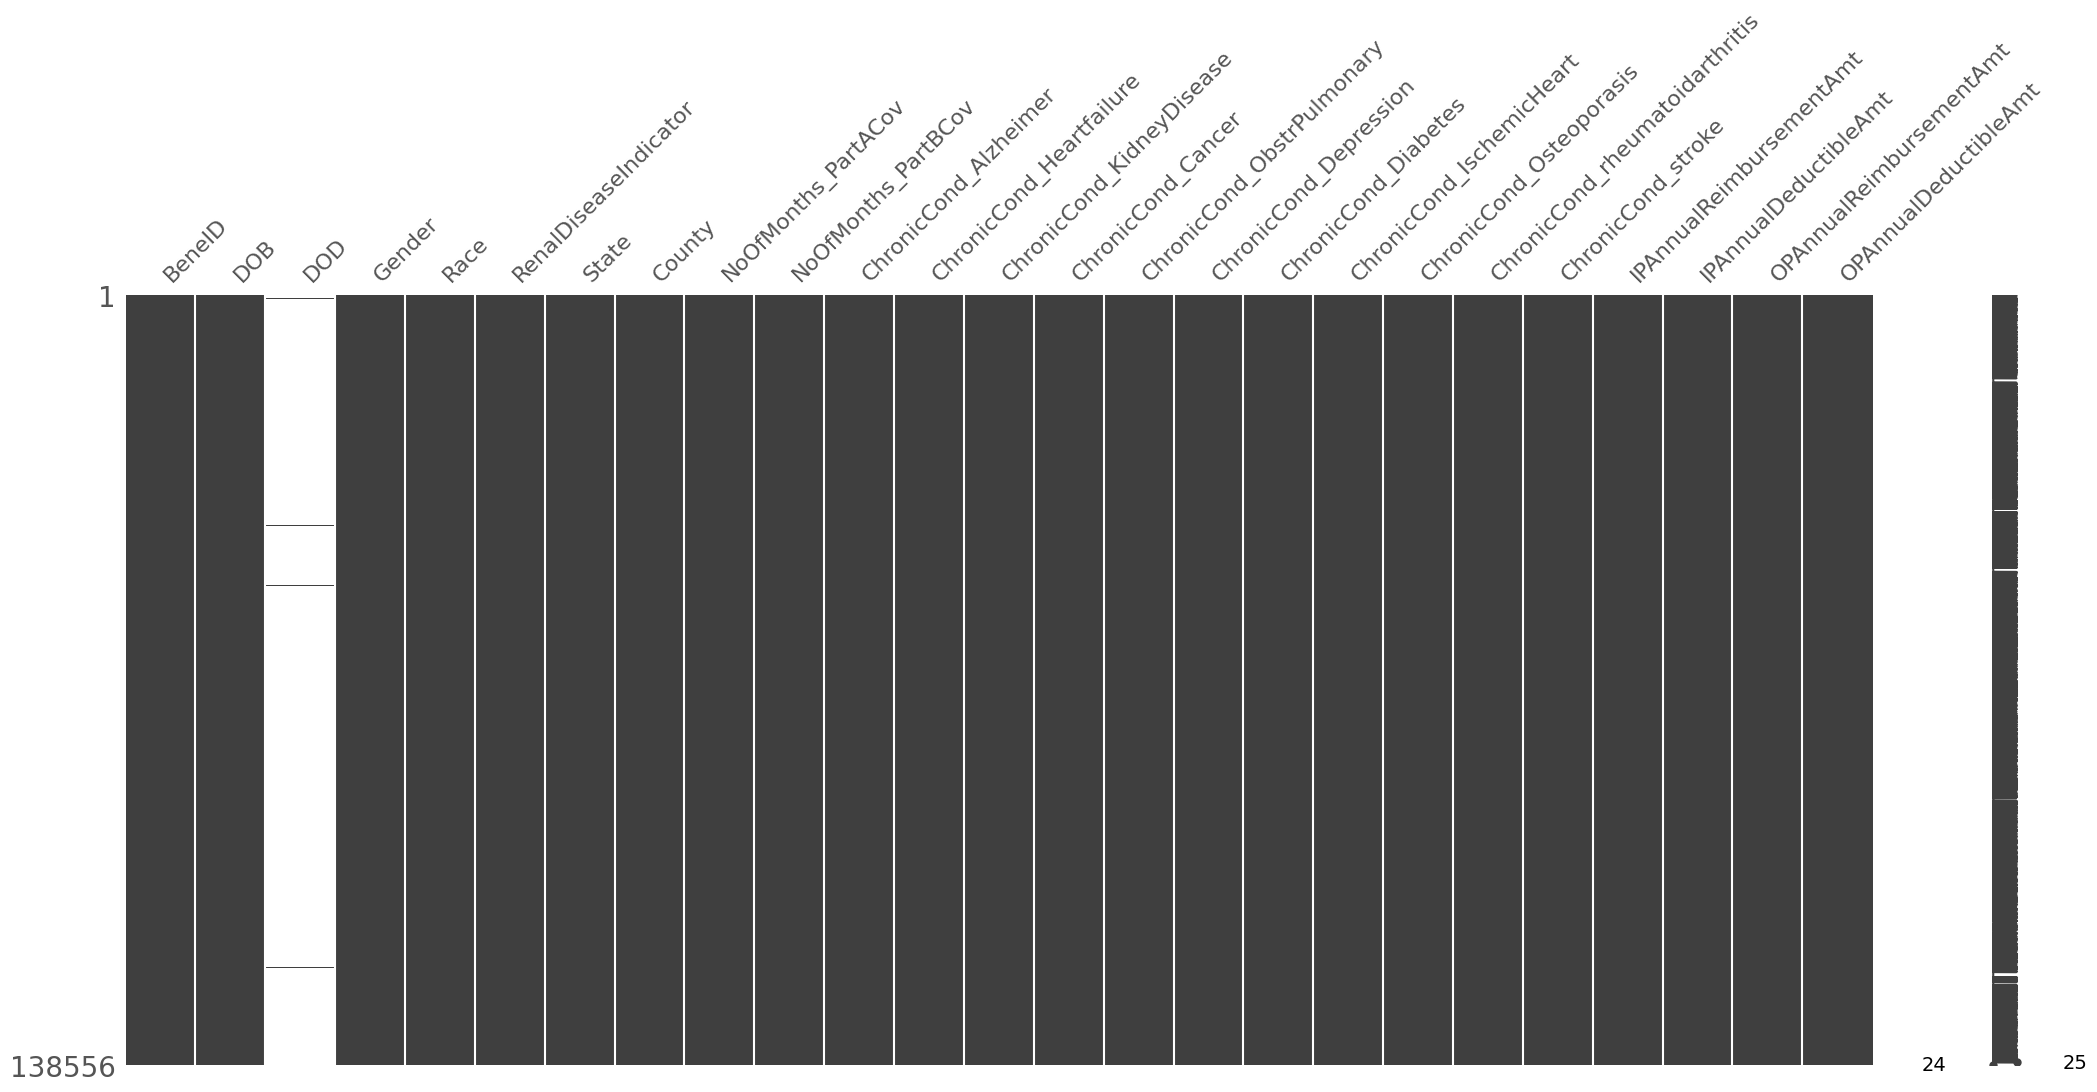

In [25]:
msno.matrix(train_beneficiary)

<Axes: >

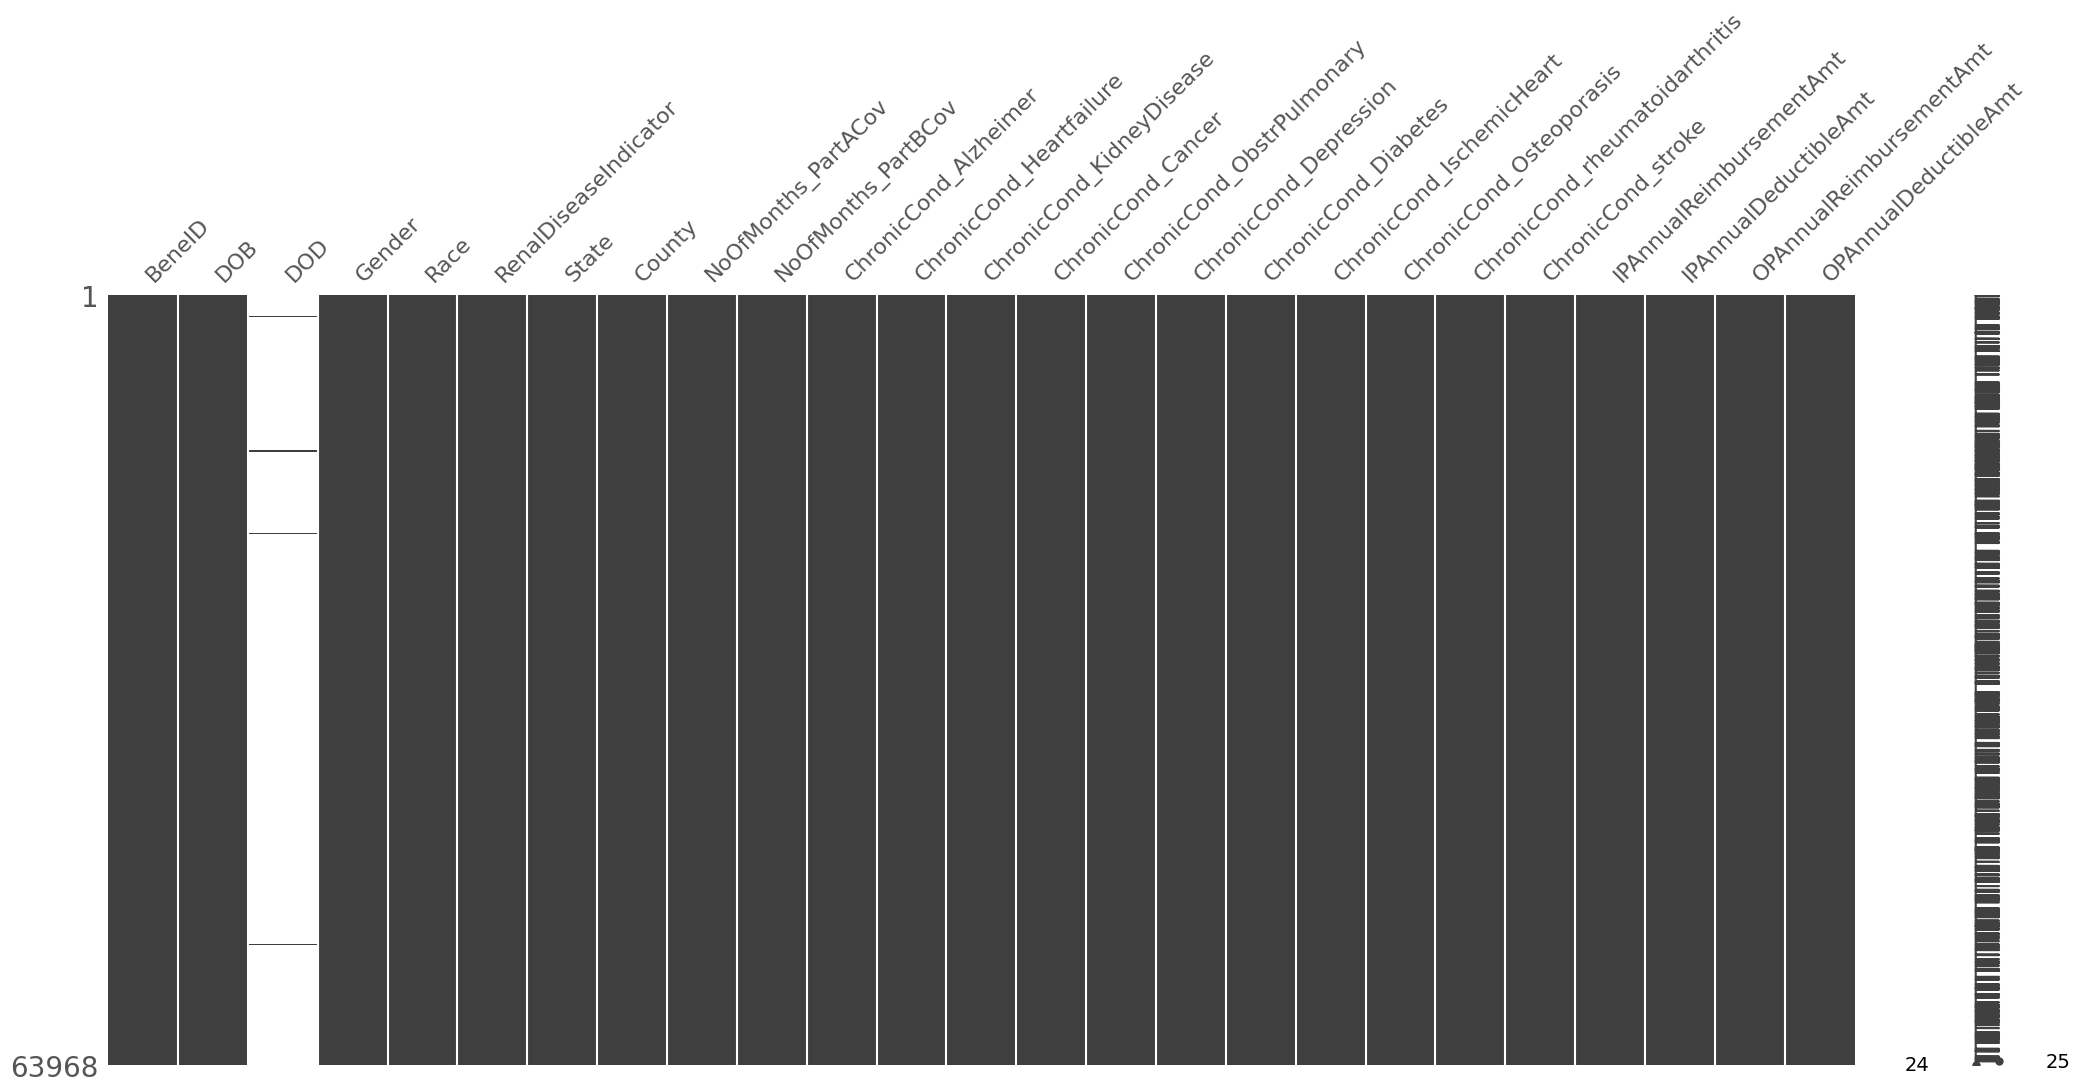

In [26]:
msno.matrix(test_beneficiary)

- Looking at numerical data description

In [27]:
# train_beneficiary.describe()
# test_beneficiary.describe()

## Label encoding both train and test datasets:

- Label encoding some categorical columns

In [28]:
benef_label_encode(train_beneficiary)
benef_label_encode(test_beneficiary)

## Creating new features for beneficiary datasets:

- Created Patient age feature from DOB and DOD

- Created feature stating whether or not the patient has deceased

- Combined outpatient and inpatient amounts for reimbursement and deductible amounts

In [29]:
benef_new_feats(train_beneficiary)
benef_new_feats(test_beneficiary)

- Dropping DOD and IP/OP reimbursement and deductible columns

In [30]:
train_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)\

test_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)

In [31]:
train_beneficiary.head(5)
# test_beneficiary.head(5)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
0,BENE11001,0,0,0,39,230,12,12,0,1,0,1,1,0,0,0,1,0,0,0,66,36060,3264,1943,1,1
1,BENE11002,1,0,0,39,280,12,12,1,1,1,1,1,1,1,1,1,1,1,0,73,30,30,1936,9,1
2,BENE11003,0,0,0,52,590,12,12,0,1,1,1,1,1,1,0,1,1,1,0,73,90,90,1936,8,1
3,BENE11004,0,0,0,39,270,12,12,0,0,1,1,1,1,0,0,0,0,1,0,87,1810,1810,1922,7,1
4,BENE11005,0,0,0,24,680,12,12,1,1,1,1,0,1,0,1,1,1,1,0,74,1790,1790,1935,9,1


- Checking number of outliers

In [32]:
# train_beneficiary[['Tot_Reimbursed_Amt']].boxplot()
# train_beneficiary[['Tot_Deductible_Amt']].boxplot()
# test_beneficiary[['Tot_Reimbursed_Amt']].boxplot()
# test_beneficiary[['Tot_Deductible_Amt']].boxplot()

In [33]:
train_beneficiary.loc[train_beneficiary.Tot_Reimbursed_Amt > 250000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
135300,BENE155688,1,0,0,19,440,12,12,1,0,0,1,1,1,0,0,1,1,0,0,90,262720,103386,1919,12,1


Text(0.5, 0, '\n Reimbursement Amount (USD)')

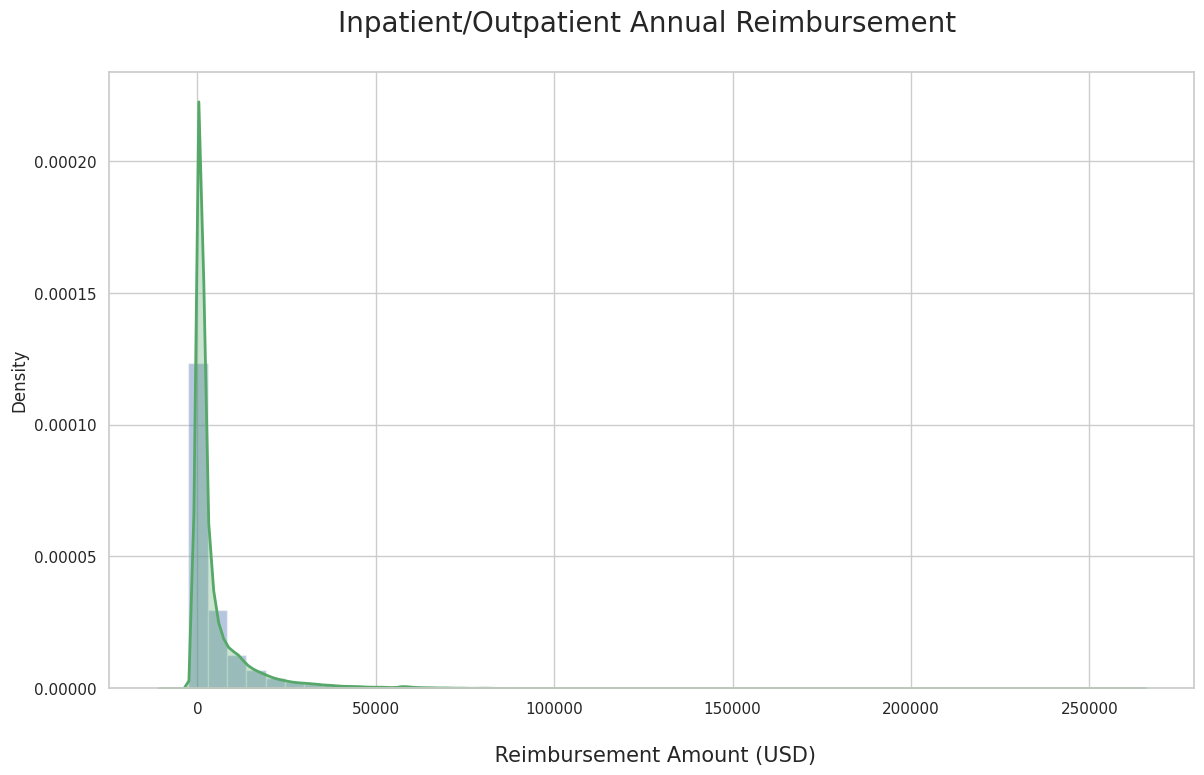

In [34]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(train_beneficiary["Tot_Reimbursed_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Reimbursement \n",fontsize = 20)
plt.xlabel("\n Reimbursement Amount (USD)", fontsize = 15)

Text(0.5, 0, '\n Deductible Amount (USD)')

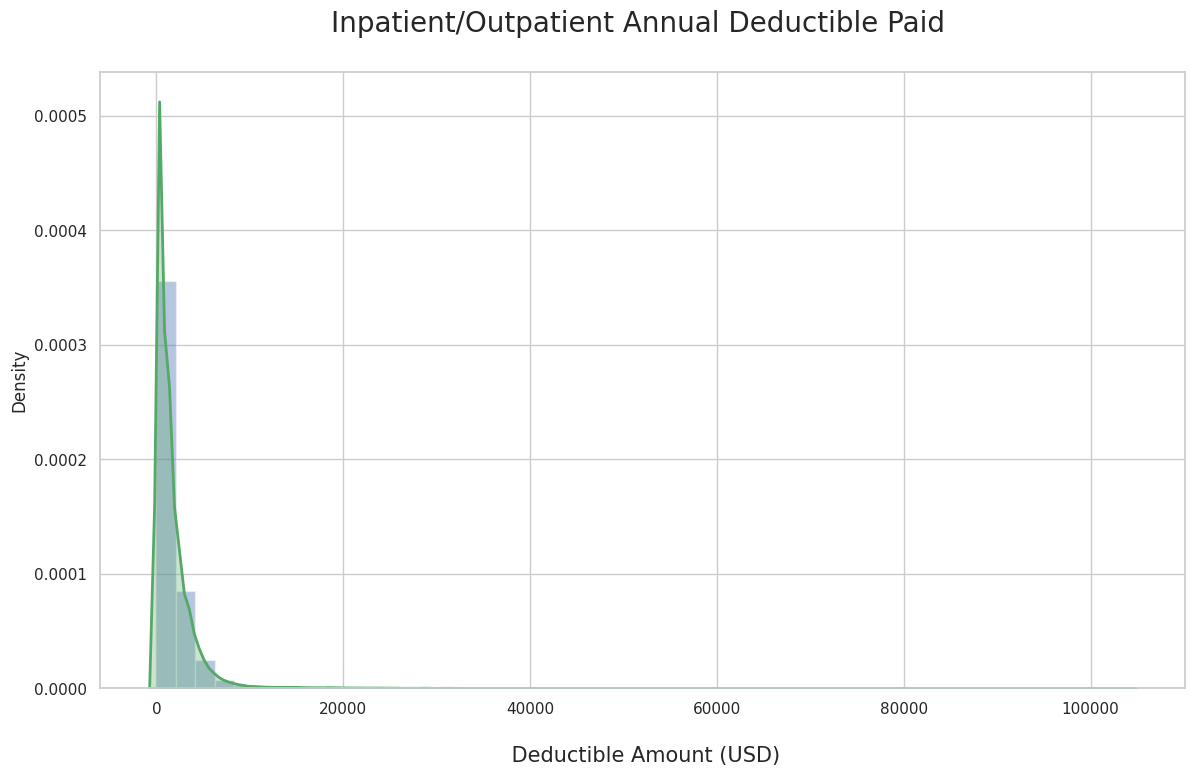

In [35]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(train_beneficiary["Tot_Deductible_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Deductible Paid \n",fontsize = 20)
plt.xlabel("\n Deductible Amount (USD)", fontsize = 15)

In [36]:
train_beneficiary.loc[train_beneficiary.Tot_Reimbursed_Amt > 150000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
2500,BENE13669,0,1,0,34,730,12,12,1,0,1,1,1,1,1,0,1,1,1,0,68,242360,104028,1941,5,1
2849,BENE14036,1,1,0,33,770,12,12,1,0,0,1,0,0,0,0,1,0,1,0,92,152780,6336,1917,7,1
10411,BENE22137,0,0,1,10,510,12,12,0,0,0,0,0,0,0,0,0,1,1,0,82,159470,11530,1927,1,1
13375,BENE25318,0,0,0,5,370,12,12,1,0,1,1,1,1,1,0,1,1,0,0,71,188650,86228,1938,9,1
62365,BENE77765,1,0,0,17,550,12,12,1,1,0,0,0,1,1,0,1,1,1,0,89,188980,88048,1920,2,1
67669,BENE83465,1,0,1,4,490,12,12,1,0,0,1,1,0,0,0,1,1,1,0,56,171190,29086,1953,9,1
91564,BENE108968,1,0,0,34,400,12,12,1,0,1,0,0,0,0,0,0,1,1,0,82,208960,88096,1927,10,1
93621,BENE111157,1,1,0,1,360,12,12,1,0,1,1,0,0,0,0,1,1,1,0,61,241510,99646,1948,7,1
95013,BENE112649,0,0,1,38,250,12,12,0,0,0,1,0,1,0,0,1,1,0,0,69,174240,20776,1940,1,1
99998,BENE117983,0,0,1,33,420,12,12,0,0,0,1,0,1,0,0,0,0,0,0,83,157500,42950,1926,6,1


In [37]:
train_beneficiary.loc[train_beneficiary.Tot_Deductible_Amt > 60000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
2500,BENE13669,0,1,0,34,730,12,12,1,0,1,1,1,1,1,0,1,1,1,0,68,242360,104028,1941,5,1
13375,BENE25318,0,0,0,5,370,12,12,1,0,1,1,1,1,1,0,1,1,0,0,71,188650,86228,1938,9,1
62365,BENE77765,1,0,0,17,550,12,12,1,1,0,0,0,1,1,0,1,1,1,0,89,188980,88048,1920,2,1
91564,BENE108968,1,0,0,34,400,12,12,1,0,1,0,0,0,0,0,0,1,1,0,82,208960,88096,1927,10,1
93621,BENE111157,1,1,0,1,360,12,12,1,0,1,1,0,0,0,0,1,1,1,0,61,241510,99646,1948,7,1
112038,BENE130861,0,0,0,44,480,12,6,0,1,1,1,1,1,1,0,1,1,0,0,81,182160,84228,1928,8,1
126846,BENE146654,1,0,0,31,100,12,12,1,1,0,0,0,0,0,0,0,0,0,0,84,207350,95978,1925,3,1
135300,BENE155688,1,0,0,19,440,12,12,1,0,0,1,1,1,0,0,1,1,0,0,90,262720,103386,1919,12,1


Text(0.5, 1.0, 'Top 10 beneficiaries with high reimbursement amounts \n')

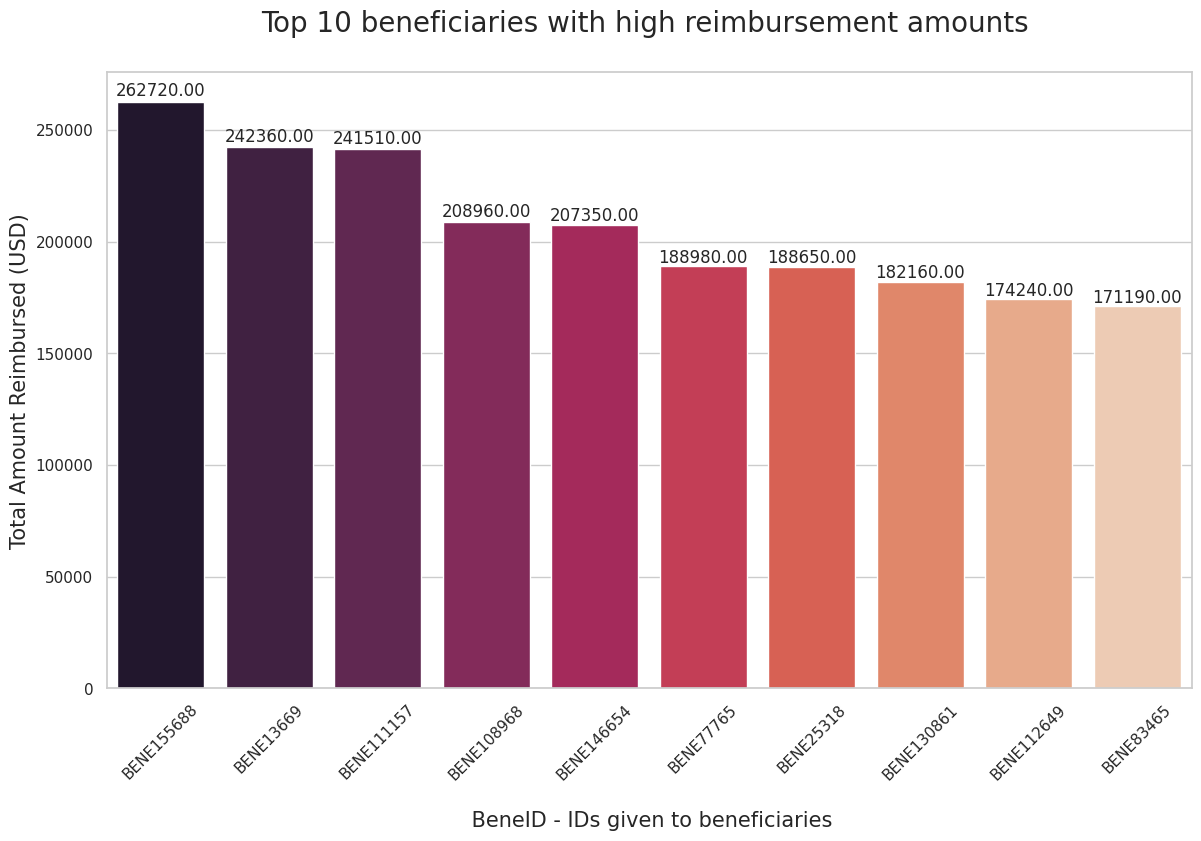

In [38]:
sns.set_theme(style='whitegrid')
my_order = train_beneficiary.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Reimbursed_Amt', order=my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Amount Reimbursed (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with high reimbursement amounts \n", fontsize = 20)

Text(0.5, 1.0, 'Top 10 beneficiaries with highest deductible amounts paid \n')

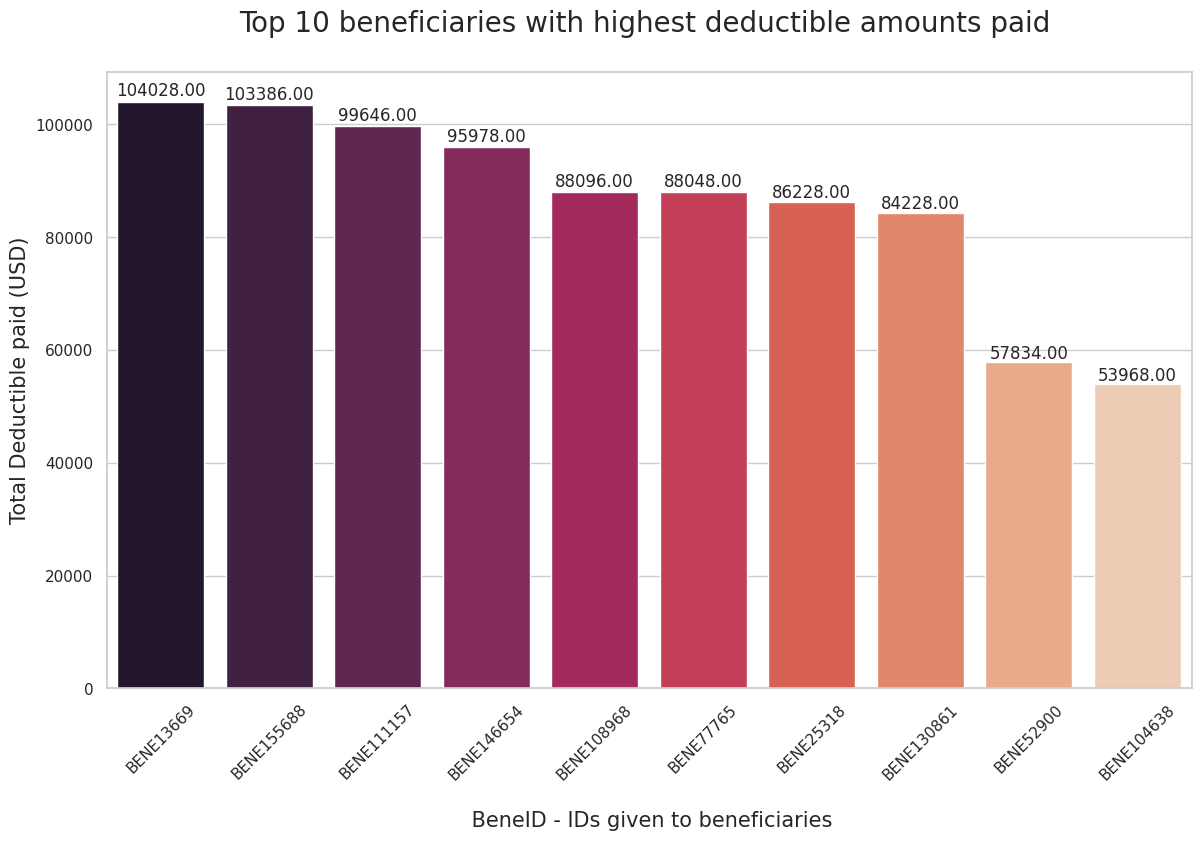

In [39]:
sns.set_theme(style='whitegrid')
my_order = train_beneficiary.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Deductible_Amt', order=my_order, palette='rocket')
show_values(plot, space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Deductible paid (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest deductible amounts paid \n", fontsize = 20)

In [40]:
# my_order = train_beneficiary['Gender'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Gender', data=train_beneficiary, aspect=1, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [41]:
# my_order = train_beneficiary['Race'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Race', data=train_beneficiary, aspect=2, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [42]:
# my_order = train_beneficiary['Deceased'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Deceased', data=train_beneficiary, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [43]:
# my_order = train_beneficiary['RenalDiseaseIndicator'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('RenalDiseaseIndicator', data=train_beneficiary, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [44]:
# my_order = train_beneficiary['State'].value_counts().sort_values(ascending=False).head(5).index
# plt = sns.catplot('State', data=train_beneficiary, aspect=3, kind='count', order=my_order)
# plt.set_xticklabels(step=1)

In [45]:
# my_order = train_beneficiary['County'].value_counts().sort_values(ascending=False).head(5).index
# plt = sns.catplot('County', data=train_beneficiary, aspect=3, kind='count', order=my_order)
# plt.set_xticklabels(step=1)

## Insights about beneficiary train dataset:

- TOP 10 beneficiaries with highest deductible paid:

In [46]:
train_beneficiary.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10)

,Tot_Deductible_Amt
BeneID,
BENE13669,104028.0
BENE155688,103386.0
BENE111157,99646.0
BENE146654,95978.0
BENE108968,88096.0
BENE77765,88048.0
BENE25318,86228.0
BENE130861,84228.0
BENE52900,57834.0


- TOP 10 beneficiaries with highest reimbursement amount received:

In [47]:
train_beneficiary.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10)

,Tot_Reimbursed_Amt
BeneID,
BENE155688,262720.0
BENE13669,242360.0
BENE111157,241510.0
BENE108968,208960.0
BENE146654,207350.0
BENE77765,188980.0
BENE25318,188650.0
BENE130861,182160.0
BENE112649,174240.0


- Beneficiaries match between both except for last two

- Looking at the conditions that the top beneficiaries have

In [48]:
ds_df = train_beneficiary[['BeneID','RenalDiseaseIndicator','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',\
                   'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary','ChronicCond_Depression', 'ChronicCond_Diabetes',\
                   'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']]


id_list = ['BENE13669','BENE155688','BENE111157',\
           'BENE146654','BENE108968','BENE77765',\
           'BENE25318','BENE130861']

ds_df[ds_df['BeneID'].isin(id_list)]

,BeneID,RenalDiseaseIndicator,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
2500,BENE13669,0,0,1,1,1,1,1,0,1,1,1
13375,BENE25318,0,0,1,1,1,1,1,0,1,1,0
62365,BENE77765,0,1,0,0,0,1,1,0,1,1,1
91564,BENE108968,0,0,1,0,0,0,0,0,0,1,1
93621,BENE111157,0,0,1,1,0,0,0,0,1,1,1
112038,BENE130861,0,1,1,1,1,1,1,0,1,1,0
126846,BENE146654,0,1,0,0,0,0,0,0,0,0,0
135300,BENE155688,0,0,0,1,1,1,0,0,1,1,0


- None of the top common beneficieries have Ischemic Heart or RenalDisease disease. They do however have some of the other Chronic conditions

- Gender encoded with '1' has majority of the beneficiaries

- Most of the beneficiaries are of race 0

- Most of the beneficiaries do not have renal desease and are alive

## # Investigating Train and Test Inpatient info files:

- Looking at column names for train_inpatient dataset

In [49]:
train_inpatient.columns # same columns for test data

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [50]:
train_inpatient.info()
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [51]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 30)
(9551, 30)


- Checking number of outliers

In [52]:
# train_inpatient[['InscClaimAmtReimbursed']].boxplot()
# test_inpatient[['InscClaimAmtReimbursed']].boxplot()
# train_inpatient[['DeductibleAmtPaid']].boxplot()
# test_inpatient[['DeductibleAmtPaid']].boxplot()

- Removing columns with high null values:

In [53]:
train_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [54]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 27)
(9551, 27)


- Adding two features that counts codes per provider

In [55]:
code_count(train_inpatient)
code_count(test_inpatient)

- Looking at null values

<Axes: >

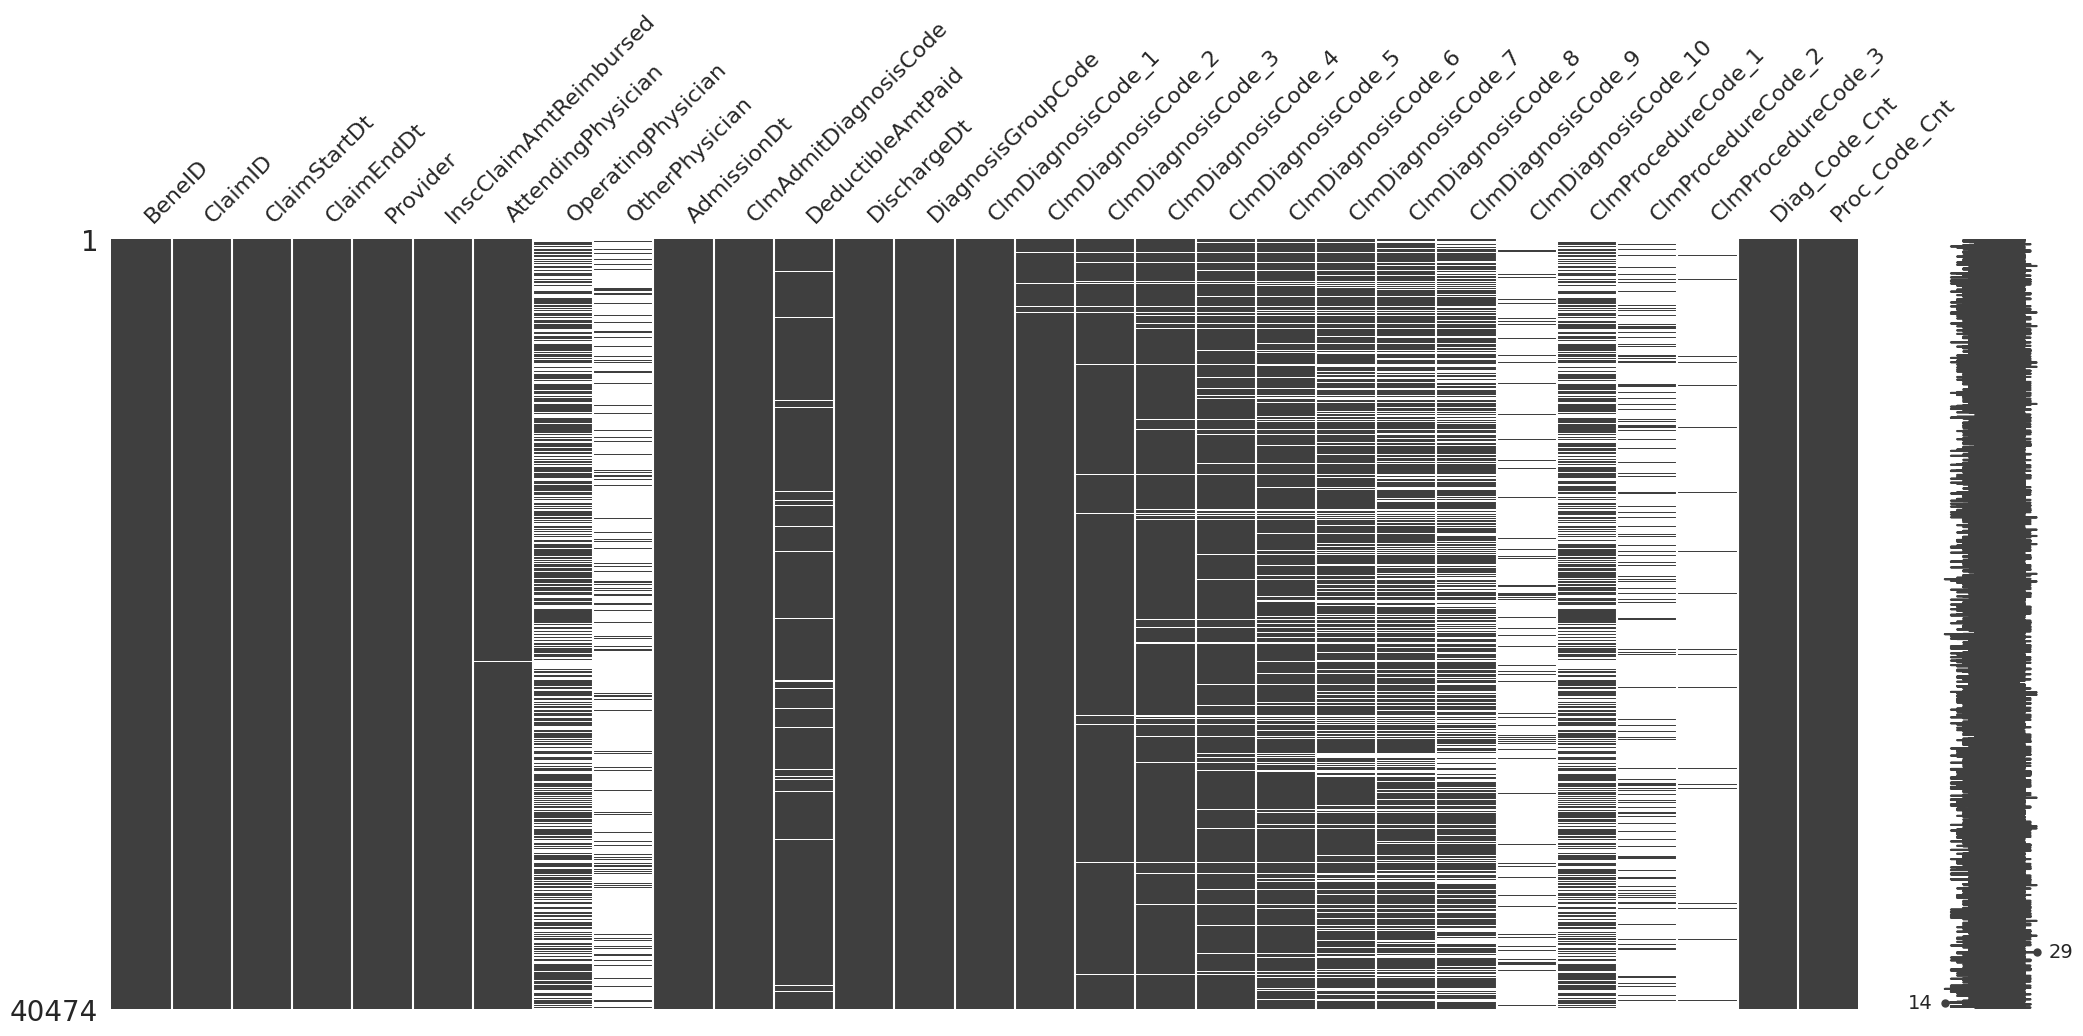

In [56]:
msno.matrix(train_inpatient)

<Axes: >

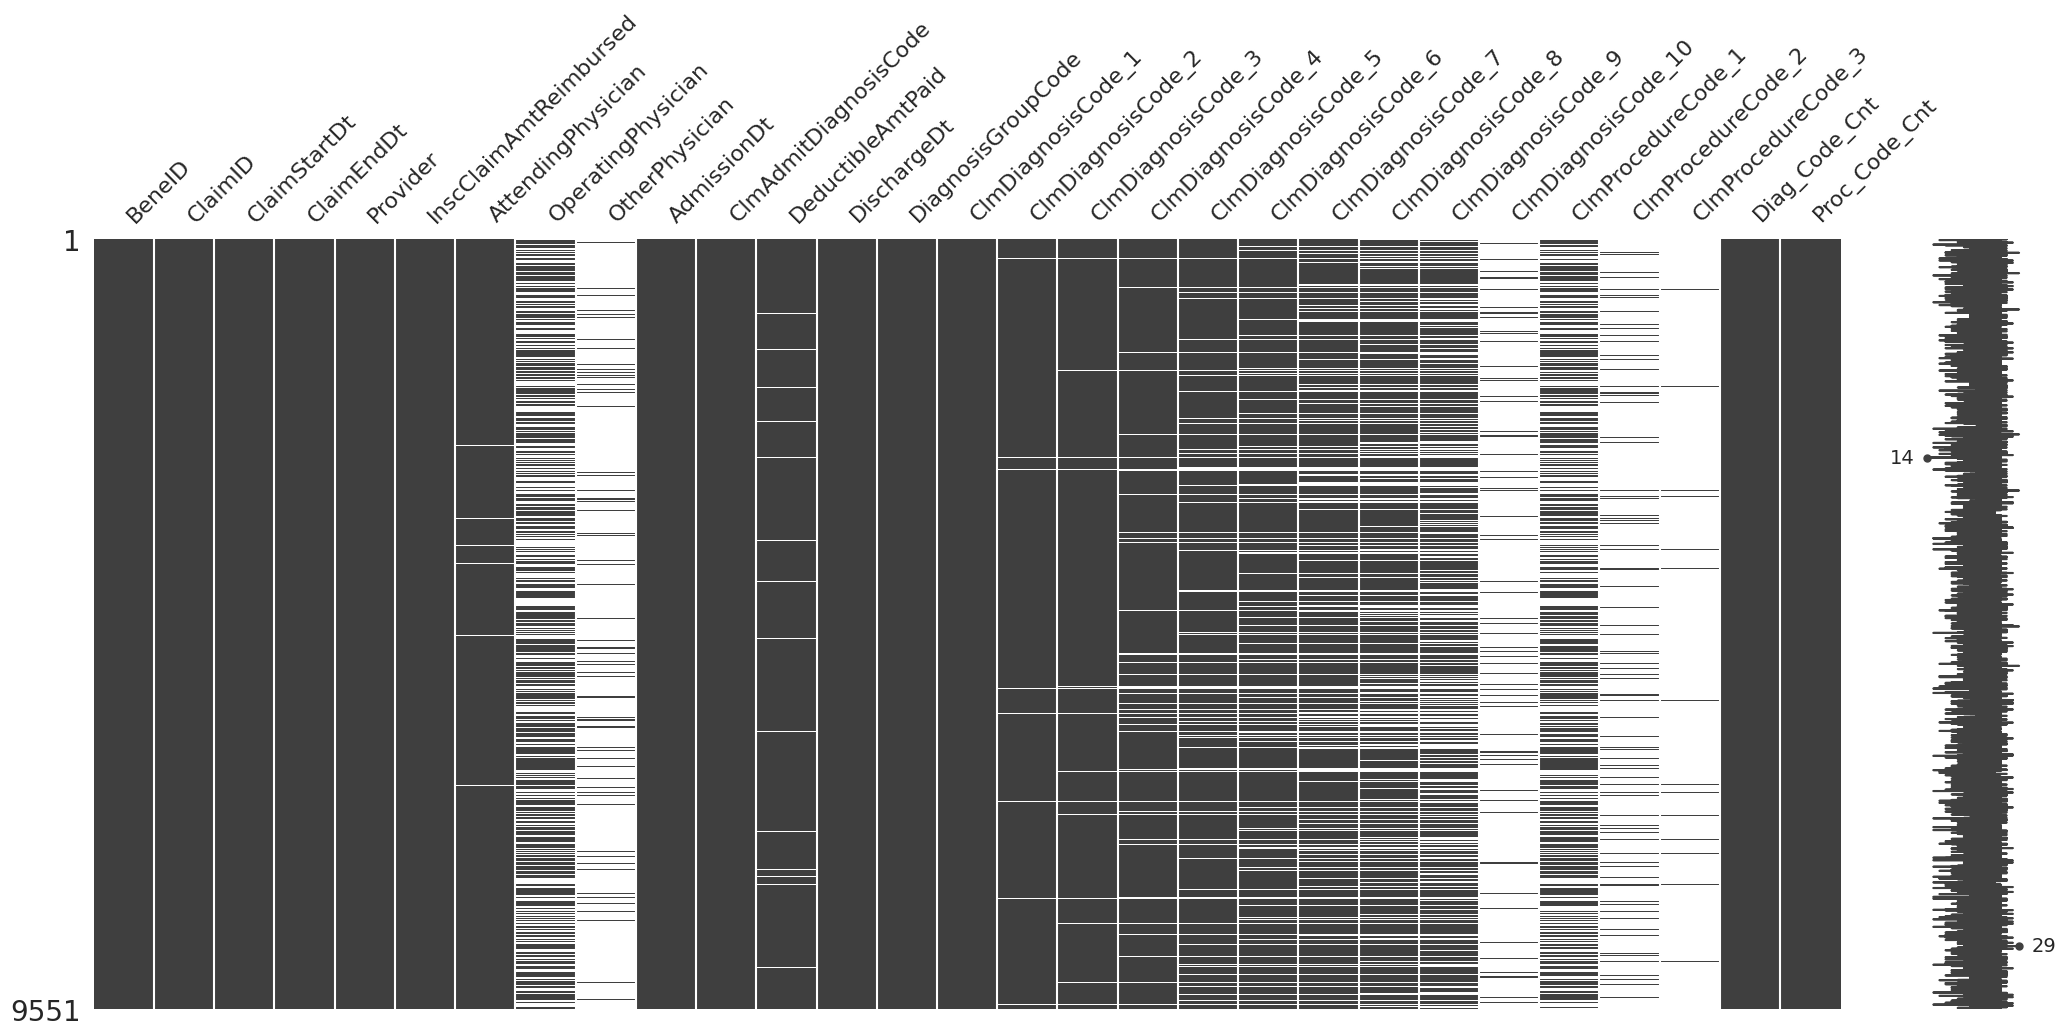

In [57]:
msno.matrix(test_inpatient)

- Imputing null values

In [58]:
in_out_na_replace(train_inpatient)
in_out_na_replace(test_inpatient)

In [59]:
train_inpatient.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,0
OperatingPhysician,0
OtherPhysician,0
AdmissionDt,0


In [60]:
test_inpatient.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,0
OperatingPhysician,0
OtherPhysician,0
AdmissionDt,0


## # Investigating train and test Outpatient info files:

- Looking at column names for train_inpatient dataset

In [61]:
train_outpatient.columns # same columns for test data

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [62]:
train_outpatient.info()
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [63]:
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 27)
(125841, 27)


- Removing columns with high null values:

In [64]:
train_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [65]:
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 24)
(125841, 24)


- Adding two features that counts codes per provider

In [66]:
code_count(train_outpatient)
code_count(test_outpatient)

- Looking at null values

<Axes: >

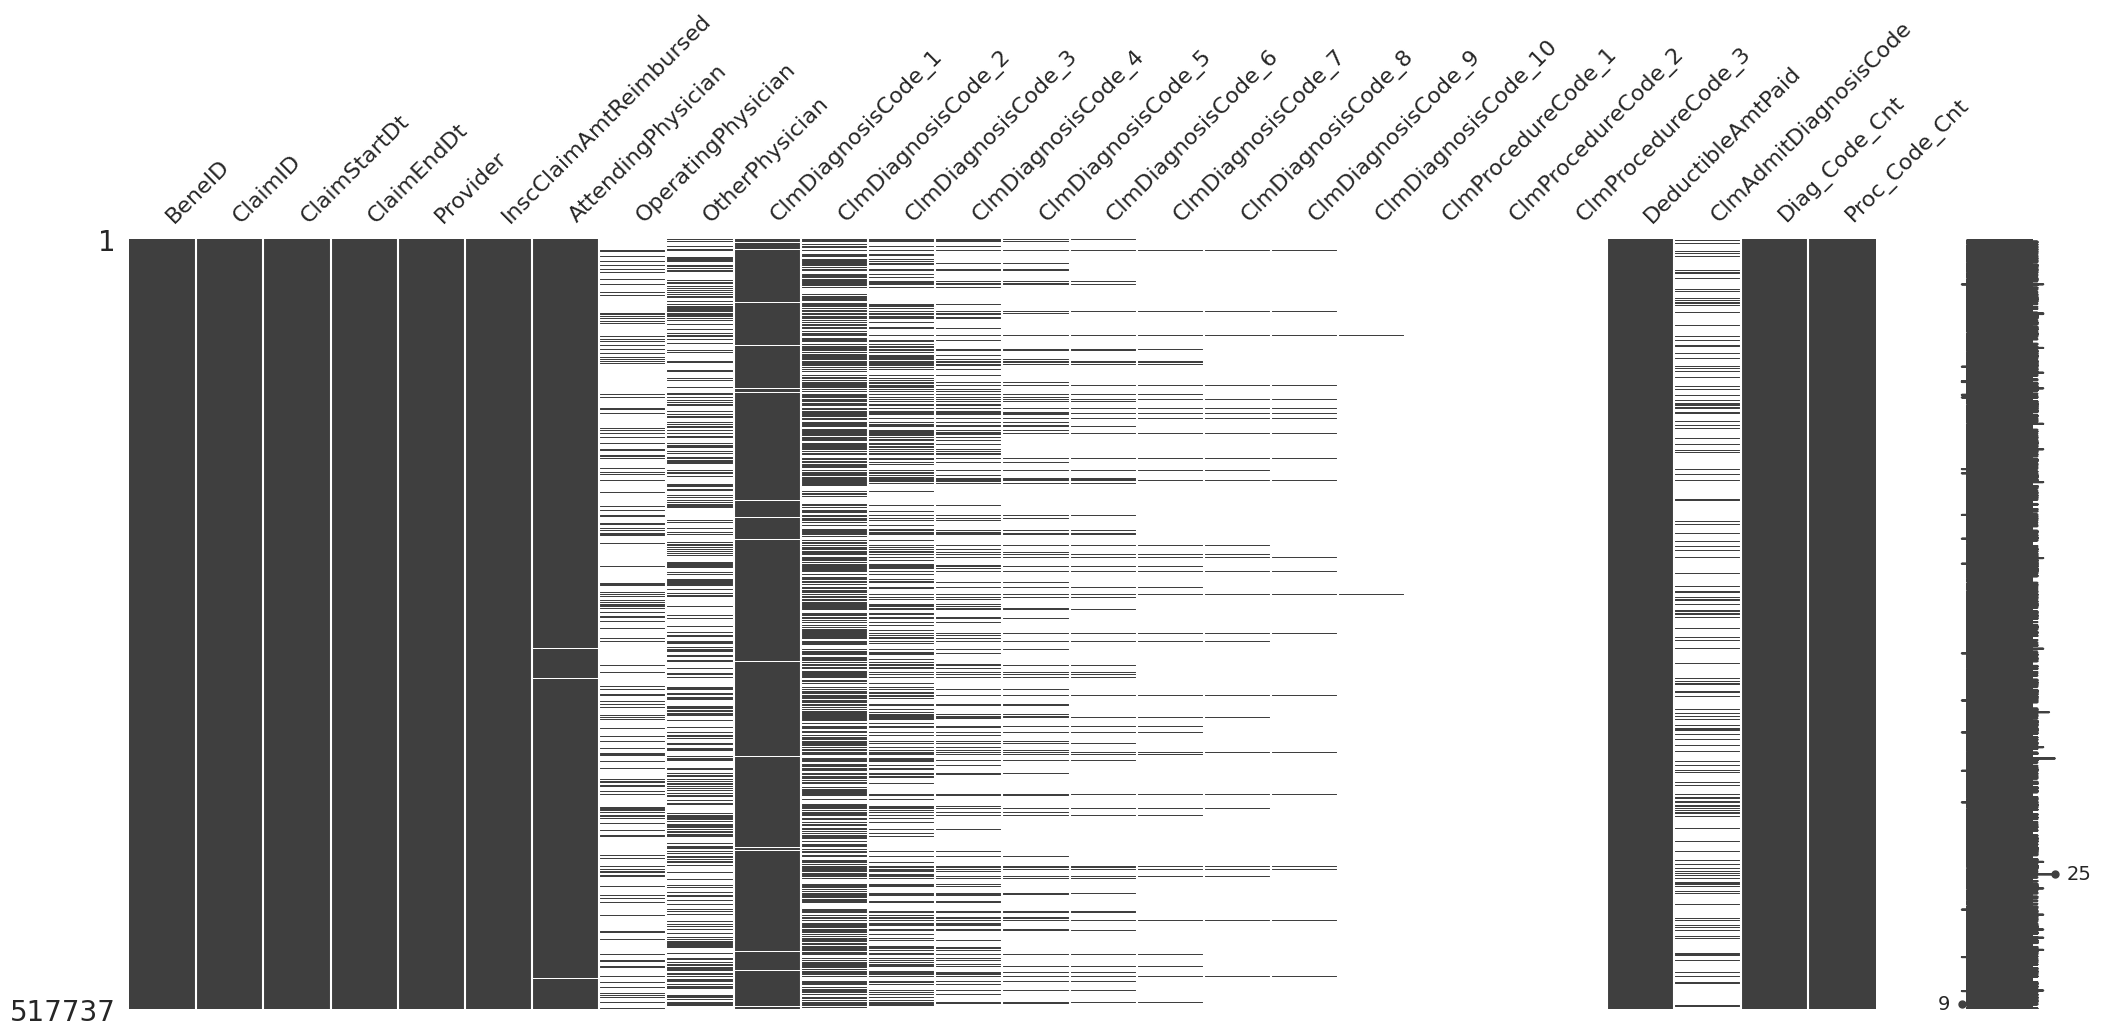

In [67]:
msno.matrix(train_outpatient)

<Axes: >

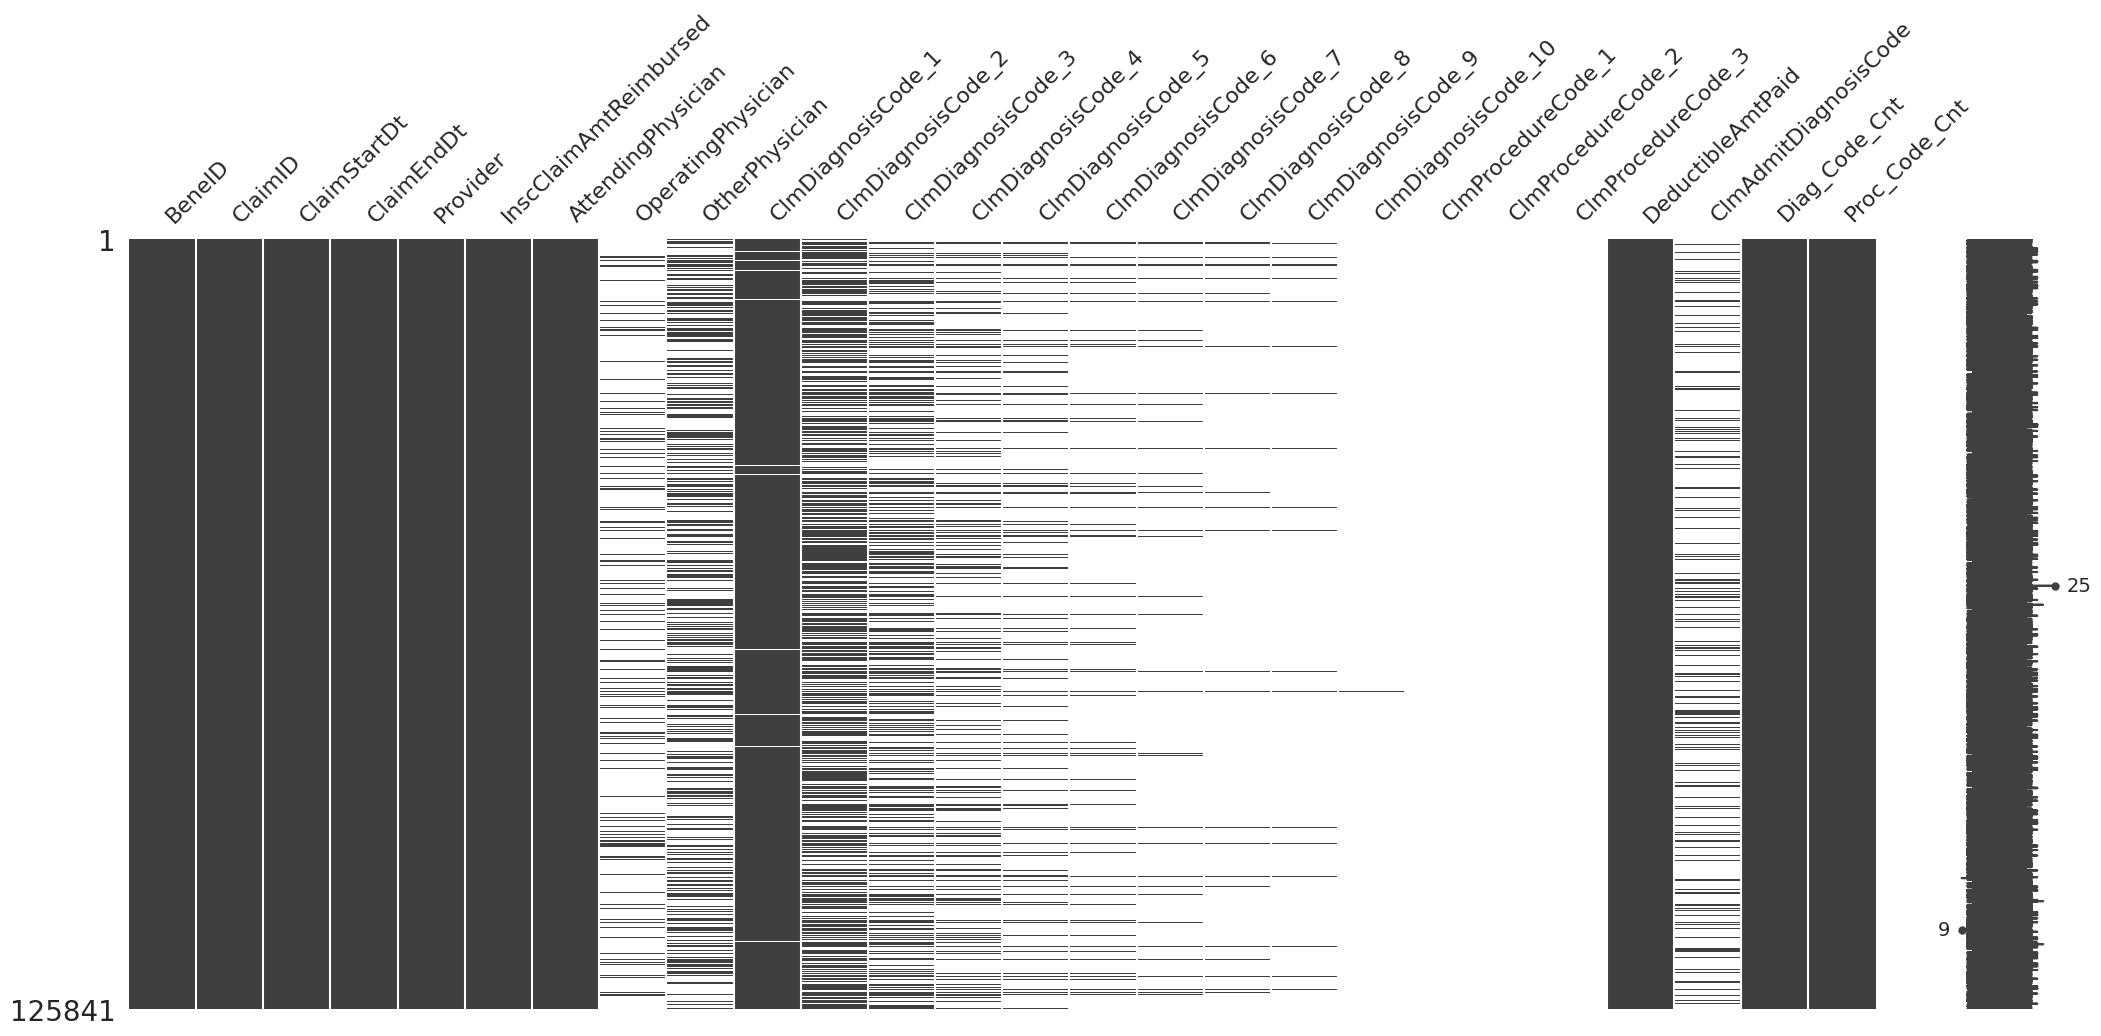

In [68]:
msno.matrix(test_outpatient)

- Imputing null values

In [69]:
in_out_na_replace(train_outpatient)
in_out_na_replace(test_outpatient)

In [70]:
train_outpatient.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,0
OperatingPhysician,0
OtherPhysician,0
ClmDiagnosisCode_1,0


In [71]:
test_outpatient.isnull().sum()

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0
InscClaimAmtReimbursed,0
AttendingPhysician,0
OperatingPhysician,0
OtherPhysician,0
ClmDiagnosisCode_1,0


- Looking at outliers

In [72]:
# train_outpatient[['InscClaimAmtReimbursed']].boxplot()
# train_outpatient[['DeductibleAmtPaid']].boxplot()
# test_outpatient[['InscClaimAmtReimbursed']].boxplot()
# test_outpatient[['DeductibleAmtPaid']].boxplot()

In [73]:
train_outpatient.loc[train_outpatient.InscClaimAmtReimbursed > 80000,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Diag_Code_Cnt,Proc_Code_Cnt
9326,BENE13669,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,None,41011,42832,4239,5570,1122,48282,51881,None,None,None,4573.0,3811.0,None,876,85186,0,0
50435,BENE25318,CLM82009,2009-01-17,2009-01-22,PRV51399,84460,PHY355989,PHY371138,None,431,2761,30500,78001,4019,51881,3315,99739,0380,2639,239.0,None,None,876,3315,0,0
232849,BENE77765,CLM82012,2009-07-13,2009-07-13,PRV53114,85680,PHY356002,PHY401806,None,51884,80707,41401,51181,5849,49121,42731,None,None,None,9671.0,None,None,897,51881,0,0
341672,BENE108968,CLM82011,2009-12-15,2009-12-22,PRV55205,84660,PHY322242,PHY329158,PHY355985,0389,1629,28731,9348,2761,2762,78552,4019,5990,None,9672.0,None,None,886,0389,0,0
349263,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,486,78552,70709,0414,51881,51883,5722,99591,2762,9672.0,5119.0,None,865,51881,0,0
418824,BENE130861,CLM82014,2009-08-27,2009-09-01,PRV56507,83160,PHY395085,PHY365635,None,3962,4168,5121,71536,V4581,41402,4412,41401,53081,None,3522.0,9971.0,None,897,4241,0,0
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,43411,41400,E8781,49390,V1051,99672,40391,04111,None,51.0,None,None,865,4280,0,0


In [74]:
train_outpatient.loc[train_outpatient.DeductibleAmtPaid > 800,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Diag_Code_Cnt,Proc_Code_Cnt
9326,BENE13669,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,None,41011,42832,4239,5570,1122,48282,51881,None,None,None,4573.0,3811.0,None,876,85186,0,0
50435,BENE25318,CLM82009,2009-01-17,2009-01-22,PRV51399,84460,PHY355989,PHY371138,None,431,2761,30500,78001,4019,51881,3315,99739,0380,2639,239.0,None,None,876,3315,0,0
232849,BENE77765,CLM82012,2009-07-13,2009-07-13,PRV53114,85680,PHY356002,PHY401806,None,51884,80707,41401,51181,5849,49121,42731,None,None,None,9671.0,None,None,897,51881,0,0
341672,BENE108968,CLM82011,2009-12-15,2009-12-22,PRV55205,84660,PHY322242,PHY329158,PHY355985,0389,1629,28731,9348,2761,2762,78552,4019,5990,None,9672.0,None,None,886,0389,0,0
349263,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,486,78552,70709,0414,51881,51883,5722,99591,2762,9672.0,5119.0,None,865,51881,0,0
418824,BENE130861,CLM82014,2009-08-27,2009-09-01,PRV56507,83160,PHY395085,PHY365635,None,3962,4168,5121,71536,V4581,41402,4412,41401,53081,None,3522.0,9971.0,None,897,4241,0,0
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,43411,41400,E8781,49390,V1051,99672,40391,04111,None,51.0,None,None,865,4280,0,0


In [75]:
test_outpatient.loc[train_outpatient.InscClaimAmtReimbursed > 80000,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Diag_Code_Cnt,Proc_Code_Cnt
9326,BENE21851,CLM192751,2009-02-13,2009-02-13,PRV55014,100,PHY324182,PHY324182,PHY394400,4011,5853,None,None,None,None,None,None,None,None,None,None,None,0,None,0,0
50435,BENE69984,CLM182887,2009-02-08,2009-02-08,PRV53707,600,PHY397412,PHY397412,PHY404411,78959,None,None,None,None,None,None,None,None,None,None,None,None,0,78959,0,0


In [76]:
test_outpatient.loc[train_outpatient.DeductibleAmtPaid > 800,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Diag_Code_Cnt,Proc_Code_Cnt
9326,BENE21851,CLM192751,2009-02-13,2009-02-13,PRV55014,100,PHY324182,PHY324182,PHY394400,4011,5853,None,None,None,None,None,None,None,None,None,None,None,0,None,0,0
50435,BENE69984,CLM182887,2009-02-08,2009-02-08,PRV53707,600,PHY397412,PHY397412,PHY404411,78959,None,None,None,None,None,None,None,None,None,None,None,None,0,78959,0,0


## Inpatient/Outpatient files EDA

- All rows in inpatient and outpatient data are unique insurance claims:

In [77]:
print(train_inpatient['ClaimID'].unique().shape)
print(train_outpatient['ClaimID'].unique().shape)

(40474,)
(517737,)


- Looking at common doctors with claims in both inpatient and outpatient datasets

In [78]:
# Number of unique Inpatient doctors and their number of Claims:

inp_at_doctors = pd.DataFrame(train_inpatient['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
inp_at_doctors.columns=['AttendingPhysician', 'Inpatient_Claims']

# Number of unique Outpatient doctors and their number of Claims:

out_at_doctors = pd.DataFrame(train_outpatient['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
out_at_doctors.columns=['AttendingPhysician', 'Outpatient_Claims']

# Creating a dataset to look at common doctors that provide both inpatient and outpatient service and
# have claims in both:

common_doc_df = inp_at_doctors.merge(out_at_doctors, on='AttendingPhysician')
common_doc_df.drop(common_doc_df.index[[6]], inplace=True)
common_doc_df = common_doc_df.sort_values(by=['Inpatient_Claims', 'Outpatient_Claims'],\
                                          ascending=[False, False])
common_doc_df

,AttendingPhysician,Inpatient_Claims,Outpatient_Claims
0,PHY315112,208,1
1,PHY412508,165,1
2,PHY404394,153,1
3,PHY339670,148,1
4,PHY332294,116,1
...,...,...,...
3641,PHY353820,1,1
3642,PHY330717,1,1
3645,PHY385023,1,1
3647,PHY393590,1,1


- Distinct Beneficiaries

In [79]:
print(train_beneficiary['BeneID'].unique().shape)
print(train_inpatient['BeneID'].unique().shape)
print(train_outpatient['BeneID'].unique().shape)

(138556,)
(31289,)
(133980,)


In [80]:
# Inpatient = looking at maximum reimbursement received and deductible amount paid per provider:

in_reim_deduc_max = train_inpatient[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

in_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
in_reim_deduc_max = in_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                  ascending=[False, False]).head(10)
in_reim_deduc_max

,Hospital_ID,Max_Reimbursement,Max_Deductible_paid
644,PRV52815,125000,1068.0
851,PRV53461,125000,1068.0
1169,PRV54742,125000,1068.0
1334,PRV55172,125000,1068.0
1584,PRV56044,125000,1068.0
1249,PRV54942,124000,1068.0
556,PRV52467,123000,1068.0
1930,PRV57173,120000,1068.0
896,PRV53706,119000,1068.0
48,PRV51119,118000,1068.0


In [81]:
inprov_lst = ['PRV52815', 'PRV53461', 'PRV54742', 'PRV55172', 'PRV56044']
df1 = train_inpatient[train_inpatient.Provider.isin(inprov_lst)]\
                    [['Provider','ClmAdmitDiagnosisCode','DiagnosisGroupCode']]
df1 = df1.groupby('Provider').agg(['count']).reset_index()
df1.columns=['Hospital_ID', 'Admit_Cde_Cnt', 'Diag_Cde_Cnt']
print(df1['Admit_Cde_Cnt'].mean())

68.4


In [82]:
inprov_lst = ['PRV51822', 'PRV56038', 'PRV54932', 'PRV54411', 'PRV53764']
df2 = train_inpatient[train_inpatient.Provider.isin(inprov_lst)]\
                    [['Provider','ClmAdmitDiagnosisCode','DiagnosisGroupCode']]
df2 = df2.groupby('Provider').agg(['count']).reset_index()
df2.columns=['Hospital_ID', 'Admit_Cde_Cnt', 'Diag_Cde_Cnt']
print(df2['Admit_Cde_Cnt'].mean())

1.0


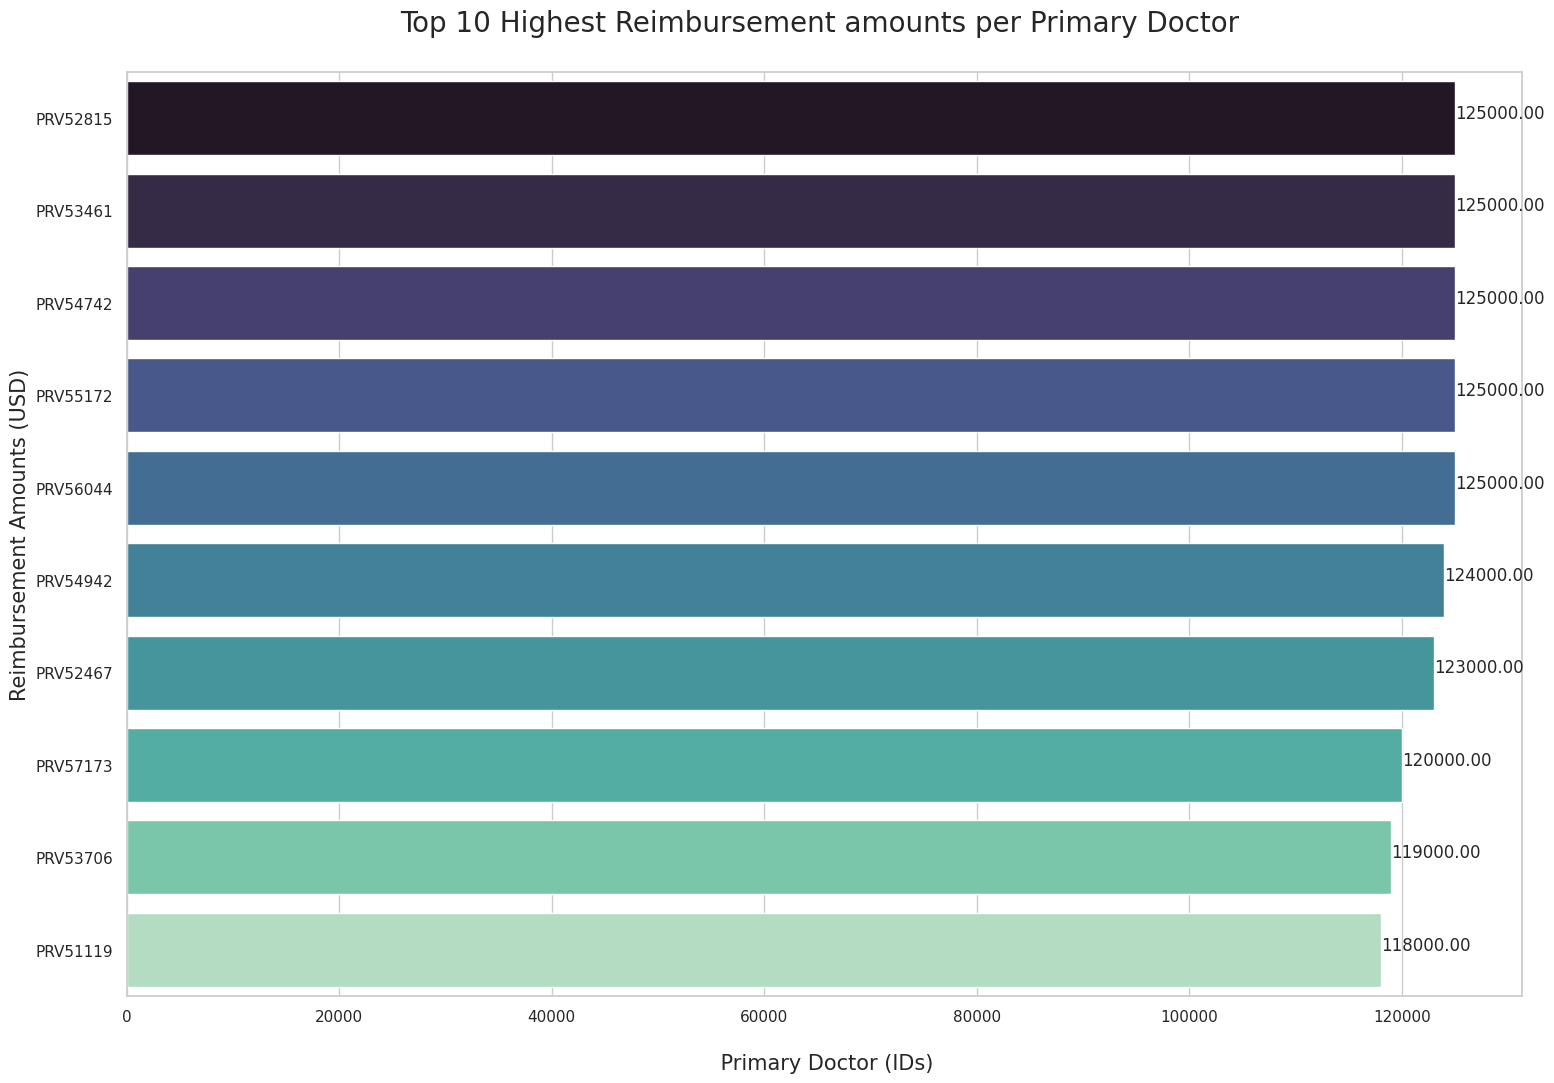

In [83]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
values = in_reim_deduc_max['Max_Reimbursement']
p = sns.barplot(x="Max_Reimbursement", y="Hospital_ID",\
            data=in_reim_deduc_max, palette='mako')

show_values(p, "h", space=0)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Reimbursement Amounts (USD)", fontsize = 15)
plt.title("Top 10 Highest Reimbursement amounts per Primary Doctor \n", fontsize = 20)
plt.show()

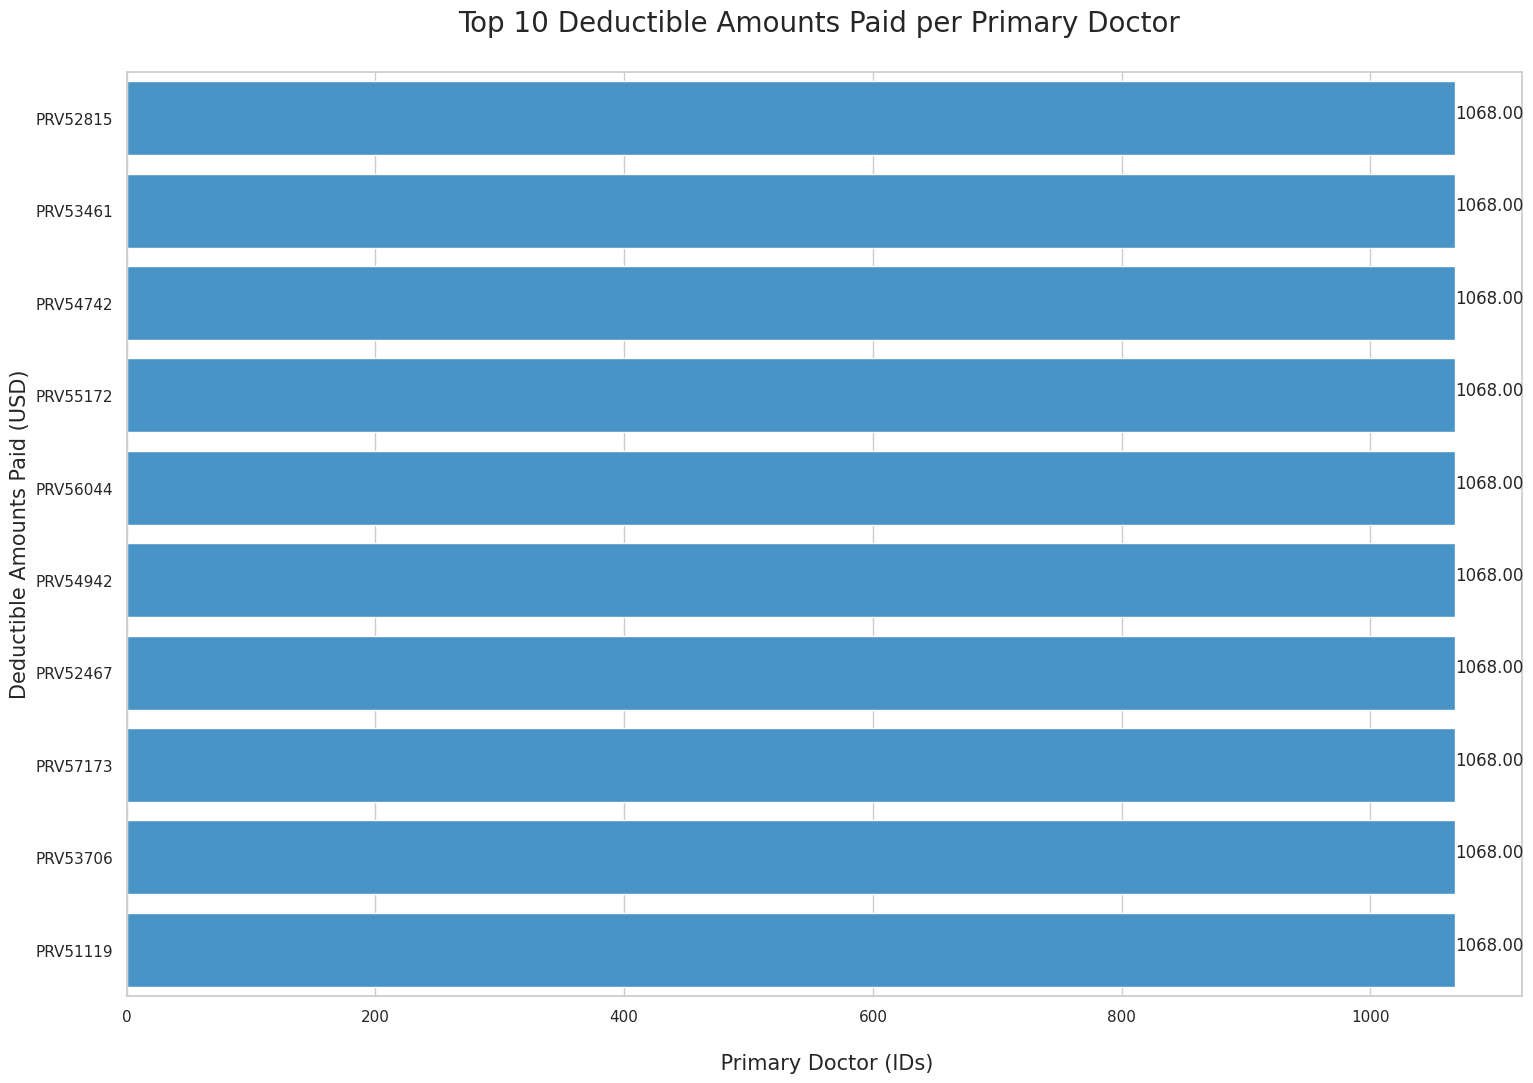

In [84]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
p = sns.barplot(x="Max_Deductible_paid", y="Hospital_ID",\
                    data=in_reim_deduc_max, color ="#3498db")
show_values(p, "h", space=0)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Deductible Amounts Paid (USD)", fontsize = 15)
plt.title("Top 10 Deductible Amounts Paid per Primary Doctor \n", fontsize = 20)
plt.show()

In [85]:
# Outpatient = looking at maximum reimbursement received and deductible amount paid per provider:

out_reim_deduc_max = train_outpatient[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

out_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
out_reim_deduc_max = out_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                    ascending=False).head(10)
out_reim_deduc_max

,Hospital_ID,Max_Reimbursement,Max_Deductible_paid
3092,PRV55172,102500,876
1848,PRV53461,101250,865
82,PRV51119,95580,865
1580,PRV53114,85680,897
3119,PRV55205,84660,886
290,PRV51399,84460,876
4091,PRV56507,83160,897
1218,PRV52631,17300,200
3735,PRV56020,17300,200
4820,PRV57518,17300,100


In [86]:
outprov_lst = ['PRV55172', 'PRV53461', 'PRV51119', 'PRV53114', 'PRV55205']
# inprov_lst = ['PRV52815', 'PRV53461', 'PRV54742', 'PRV55172', 'PRV56044']
df3 = train_outpatient[train_outpatient.Provider.isin(inprov_lst)]\
                    [['Provider','ClmAdmitDiagnosisCode']]
df3 = df3.groupby('Provider').agg(['count']).reset_index()
df3.columns=['Hospital_ID', 'Admit_Cde_Cnt']
print(df3['Admit_Cde_Cnt'].mean())

30.75


In [87]:
outprov_lst = ['PRV54046', 'PRV54057', 'PRV54179', 'PRV55078', 'PRV55591']
df4 = train_outpatient[train_outpatient.Provider.isin(inprov_lst)]\
                    [['Provider','ClmAdmitDiagnosisCode']]
df4 = df4.groupby('Provider').agg(['count']).reset_index()
df4.columns=['Hospital_ID', 'Admit_Cde_Cnt']
print(df4['Admit_Cde_Cnt'].mean())

30.75


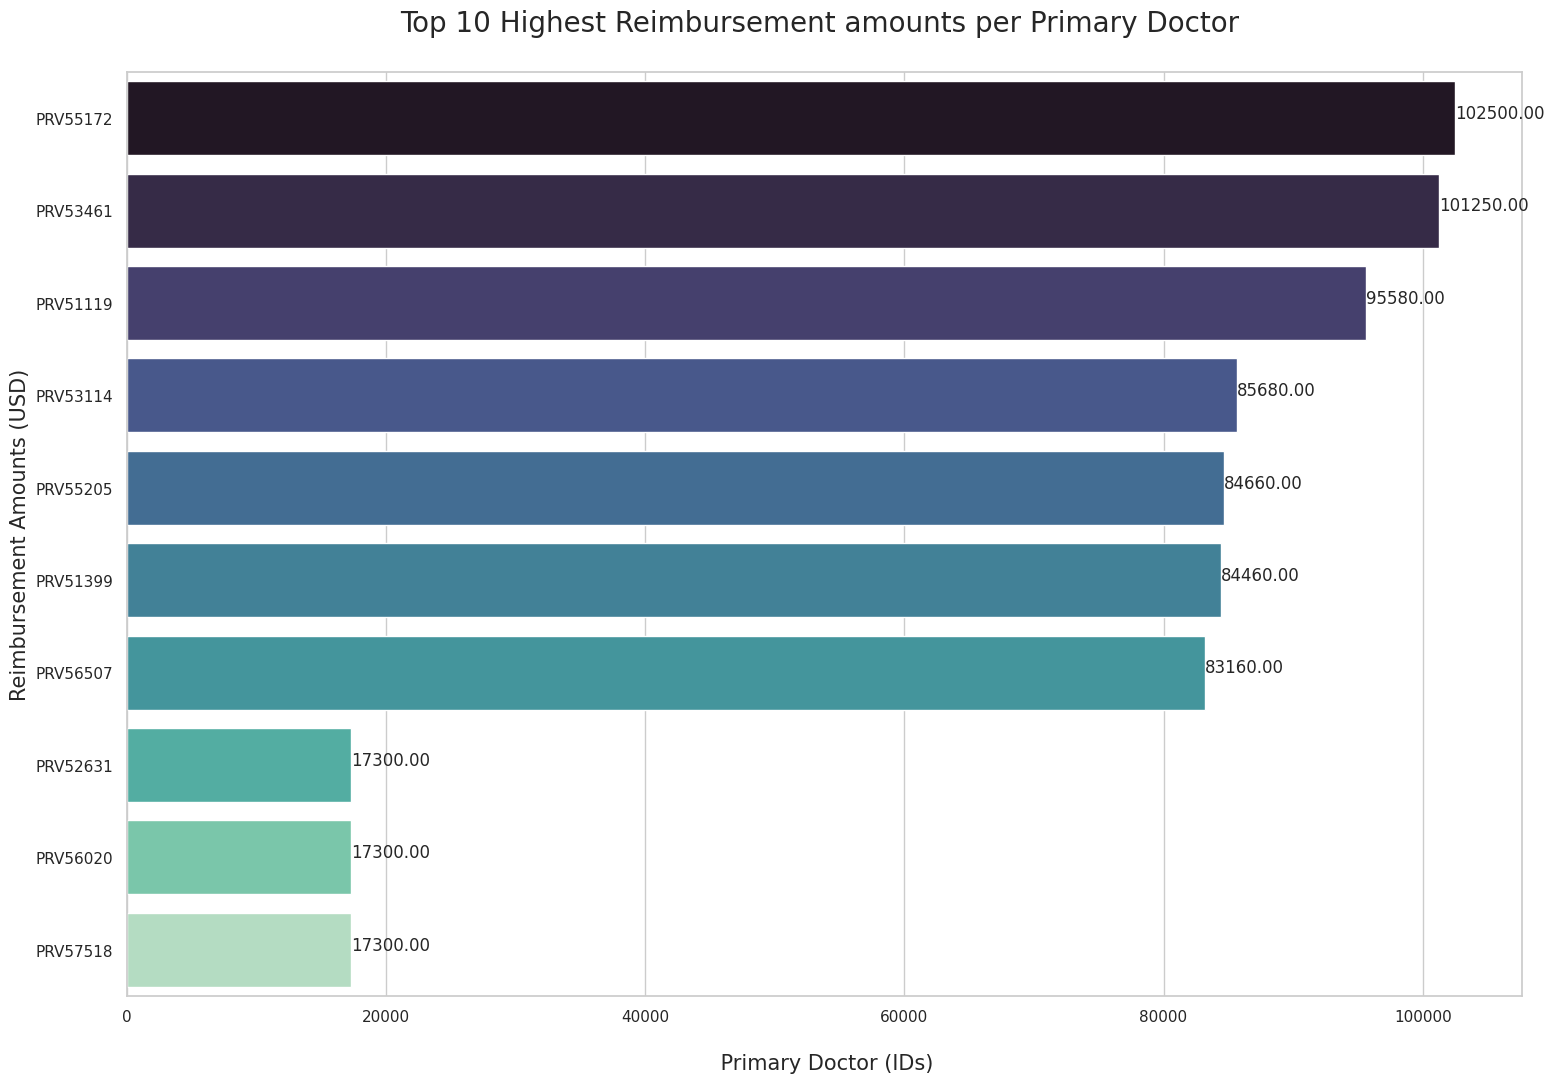

In [88]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
p=sns.barplot(x="Max_Reimbursement", y="Hospital_ID",\
            data=out_reim_deduc_max, palette='mako')
show_values(p, "h", space=0)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Reimbursement Amounts (USD)", fontsize = 15)
plt.title("Top 10 Highest Reimbursement amounts per Primary Doctor \n", fontsize = 20)
plt.show()

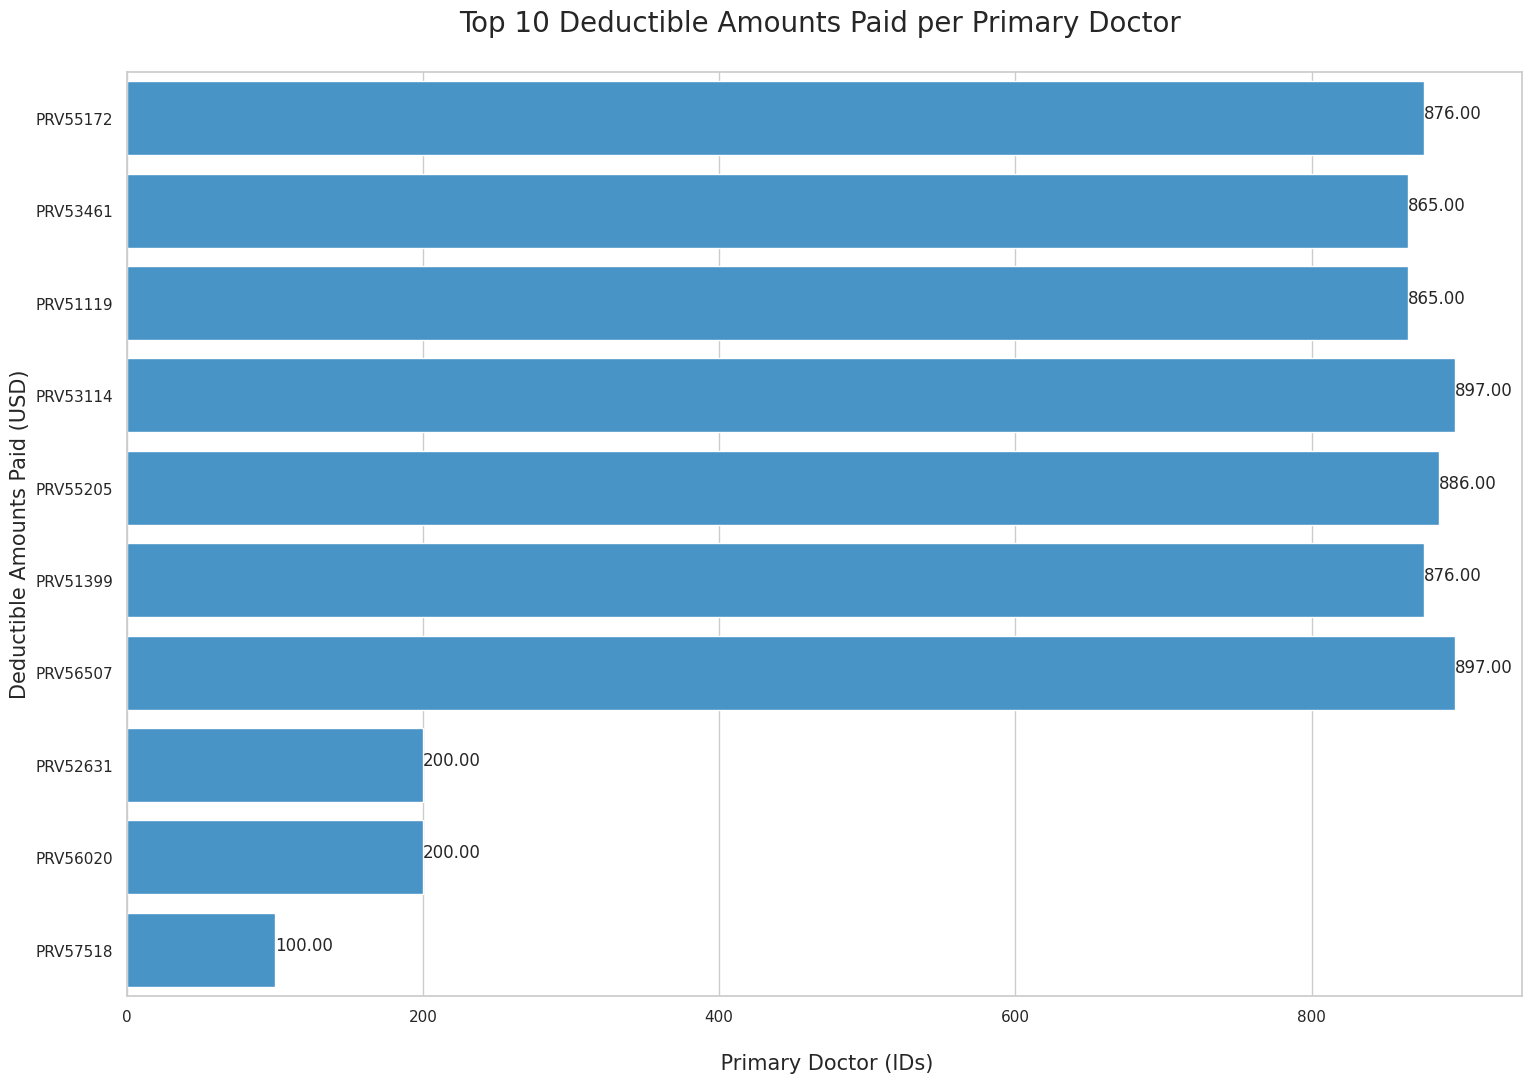

In [89]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
p=sns.barplot(x="Max_Deductible_paid", y="Hospital_ID",\
                    data=out_reim_deduc_max, color ="#3498db")
show_values(p, "h", space=0)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Deductible Amounts Paid (USD)", fontsize = 15)
plt.title("Top 10 Deductible Amounts Paid per Primary Doctor \n", fontsize = 20)
plt.show()

In [90]:
# Looking at number of hospitals each beneficiary is associated with:

in_bene_prov = train_inpatient[['BeneID','Provider']].drop_duplicates()
in_bene_prov = pd.DataFrame(in_bene_prov.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
in_bene_prov.columns =['Beneficiaries', 'Inp_Affiliated_Hospitals']
in_bene_prov.head(10)

,Beneficiaries,Inp_Affiliated_Hospitals
0,BENE152105,5
1,BENE30123,5
2,BENE63935,5
3,BENE126118,5
4,BENE55497,5
5,BENE43638,5
6,BENE49263,5
7,BENE92472,5
8,BENE83032,5
9,BENE104565,5


In [91]:
inbene_lst = ['BENE126118', 'BENE83032', 'BENE55497', 'BENE104565', 'BENE55873']
df5 = train_inpatient[train_inpatient.BeneID.isin(inbene_lst)]
df5 = df5.groupby('BeneID')['ClmAdmitDiagnosisCode'].count()
df5.columns =['Admit_Cde_Cnt', 'Diag_Cde_Cnt']
df5.mean()

np.float64(5.4)

In [92]:
inbene_lst = ['BENE148612', 'BENE148610', 'BENE148605', 'BENE148603', 'BENE14860']
df6 = train_inpatient[train_inpatient.BeneID.isin(inbene_lst)]
df6 = df6.groupby('BeneID')['ClmAdmitDiagnosisCode'].count()
df6.columns =['Admit_Cde_Cnt', 'Diag_Cde_Cnt']
df6.mean()

np.float64(1.0)

In [93]:
# Looking at number of hospitals each beneficiary is associated with:

out_bene_prov = train_outpatient[['BeneID','Provider']].drop_duplicates()
out_bene_prov = pd.DataFrame(out_bene_prov.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
out_bene_prov.columns =['Beneficiaries', 'Out_Affiliated_Hospitals']
out_bene_prov.head(10)

,Beneficiaries,Out_Affiliated_Hospitals
0,BENE40202,19
1,BENE122143,17
2,BENE122118,16
3,BENE120090,16
4,BENE140999,16
5,BENE153509,16
6,BENE11132,15
7,BENE19616,15
8,BENE25386,15
9,BENE32909,15


In [94]:
inbene_lst = ['BENE40202', 'BENE122143', 'BENE122118', 'BENE153509', 'BENE120090']
df6 = train_outpatient[train_outpatient.BeneID.isin(inbene_lst)]
df6 = df6.groupby('BeneID')['ClmAdmitDiagnosisCode'].count()
df6.columns =['Admit_Cde_Cnt']
df6.mean()

np.float64(20.6)

In [95]:
inbene_lst = ['BENE35041', 'BENE35043', 'BENE35048', 'BENE35051', 'BENE35052']
df7 = train_outpatient[train_outpatient.BeneID.isin(inbene_lst)]
df7 = df7.groupby('BeneID')['ClmAdmitDiagnosisCode'].count()
df7.columns =['Admit_Cde_Cnt']
df7.mean()

np.float64(3.8)

In [96]:
# Do any beneficiaries have both inpatient and outpatient claims?

common_ben_df = in_bene_prov.merge(out_bene_prov, on='Beneficiaries').\
                             sort_values(by=['Inp_Affiliated_Hospitals',\
                                             'Out_Affiliated_Hospitals']\
                                         ,ascending=[False, False])

common_ben_df

,Beneficiaries,Inp_Affiliated_Hospitals,Out_Affiliated_Hospitals
6,BENE49263,5,7
1,BENE30123,5,6
11,BENE87023,5,6
10,BENE117116,5,5
3,BENE126118,5,3
...,...,...,...
26695,BENE148665,1,1
26699,BENE148615,1,1
26703,BENE148605,1,1
26705,BENE14860,1,1


In [97]:
# Hospitals that inpatient doctors are associated with:

in_doc_prov = train_inpatient[['AttendingPhysician','Provider']].drop_duplicates()
in_doc_prov = pd.DataFrame(in_doc_prov.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
in_doc_prov.drop(in_doc_prov.index[[0]], inplace=True)
in_doc_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
in_doc_prov # PHY386600, PHY395862, PHY421048, PHY423850, PHY359004

,Primary_Doctor,Affiliated_Hospitals
1,PHY386600,3
2,PHY421048,3
3,PHY359004,3
4,PHY423850,3
5,PHY395862,3
...,...,...
11600,PHY351895,1
11601,PHY351896,1
11602,PHY351912,1
11603,PHY351919,1


In [98]:
#Looking at Fraud vs Non Fraud

inpdoc_lst = ['PHY386600', 'PHY395862', 'PHY421048', 'PHY423850', 'PHY359004']
df1 = train_inpatient[train_inpatient.AttendingPhysician.isin(inpdoc_lst)]\
               [['AttendingPhysician','Provider']].drop_duplicates()
df1 = df1.merge(train_y, on='Provider')
df1 = df1.groupby(['AttendingPhysician','PotentialFraud']).agg(['count']).reset_index()
df1.columns=['Primary_Doctor', 'Fraud_labels', 'Hospital_Count']
df1

,Primary_Doctor,Fraud_labels,Hospital_Count
0,PHY359004,No,1
1,PHY359004,Yes,2
2,PHY386600,No,2
3,PHY386600,Yes,1
4,PHY395862,No,3
5,PHY421048,No,1
6,PHY421048,Yes,2
7,PHY423850,No,1
8,PHY423850,Yes,2


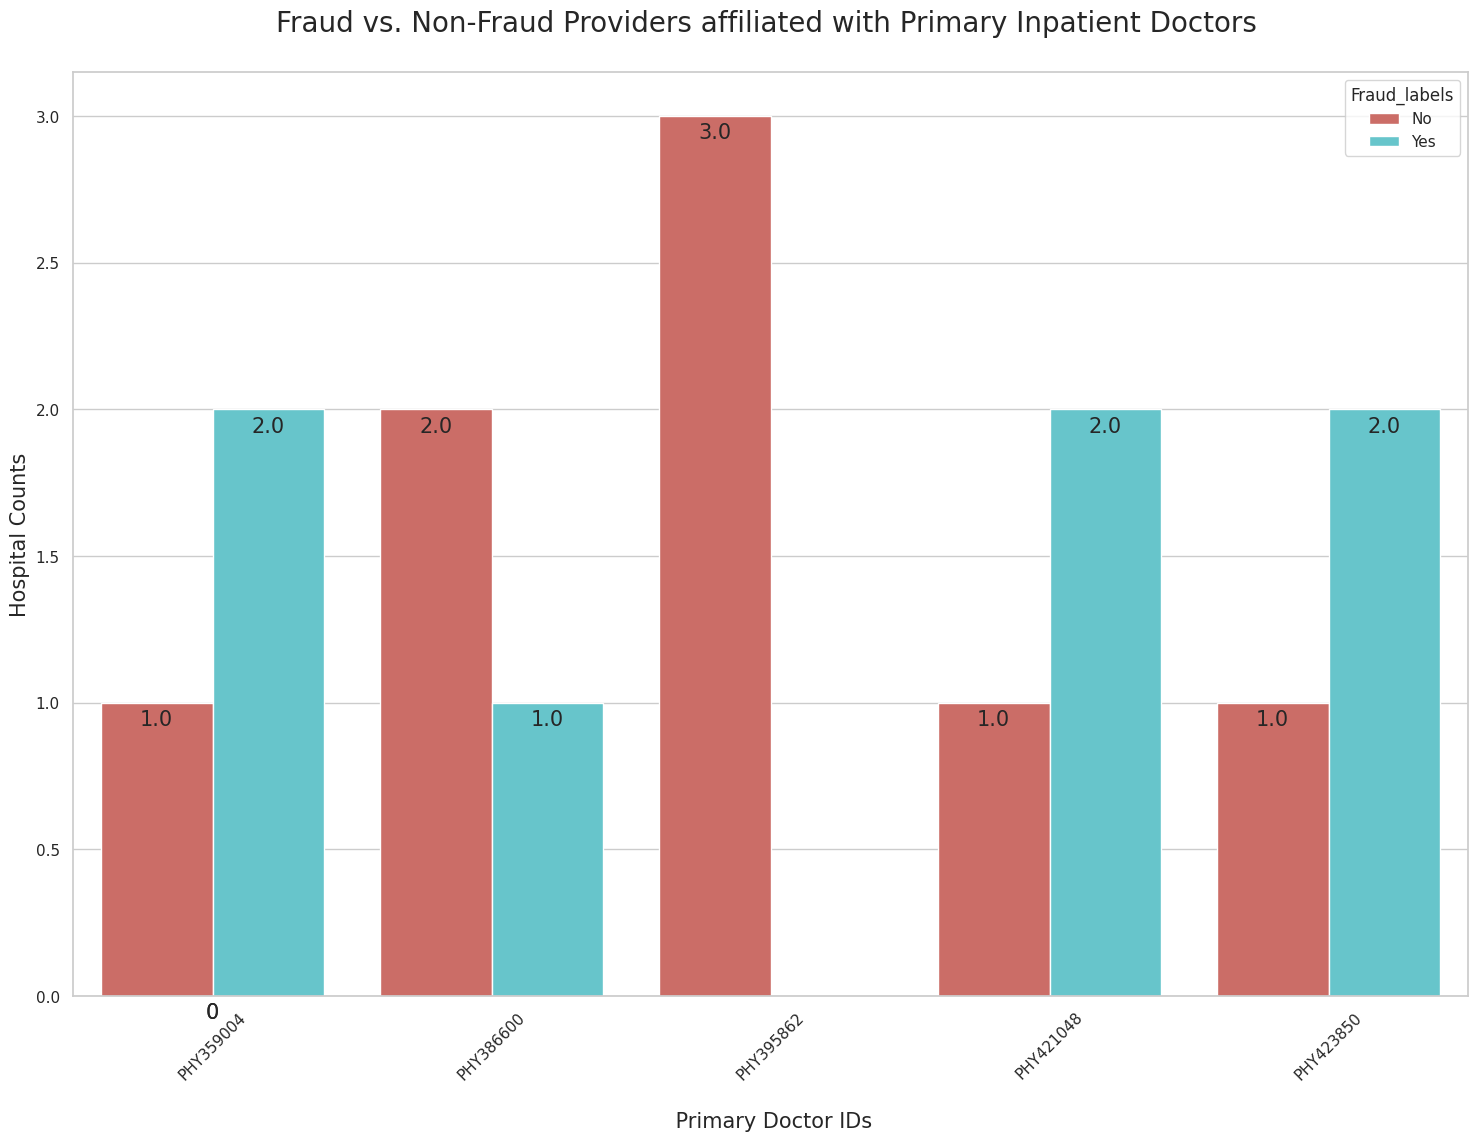

In [99]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Primary_Doctor", y="Hospital_Count", hue="Fraud_labels",\
            data=df1, ci=None, palette='hls')
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.xlabel("\n Primary Doctor IDs", fontsize = 15)
plt.ylabel("Hospital Counts", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers affiliated with Primary Inpatient Doctors \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Doctors affiliated with most Hospitals \n')

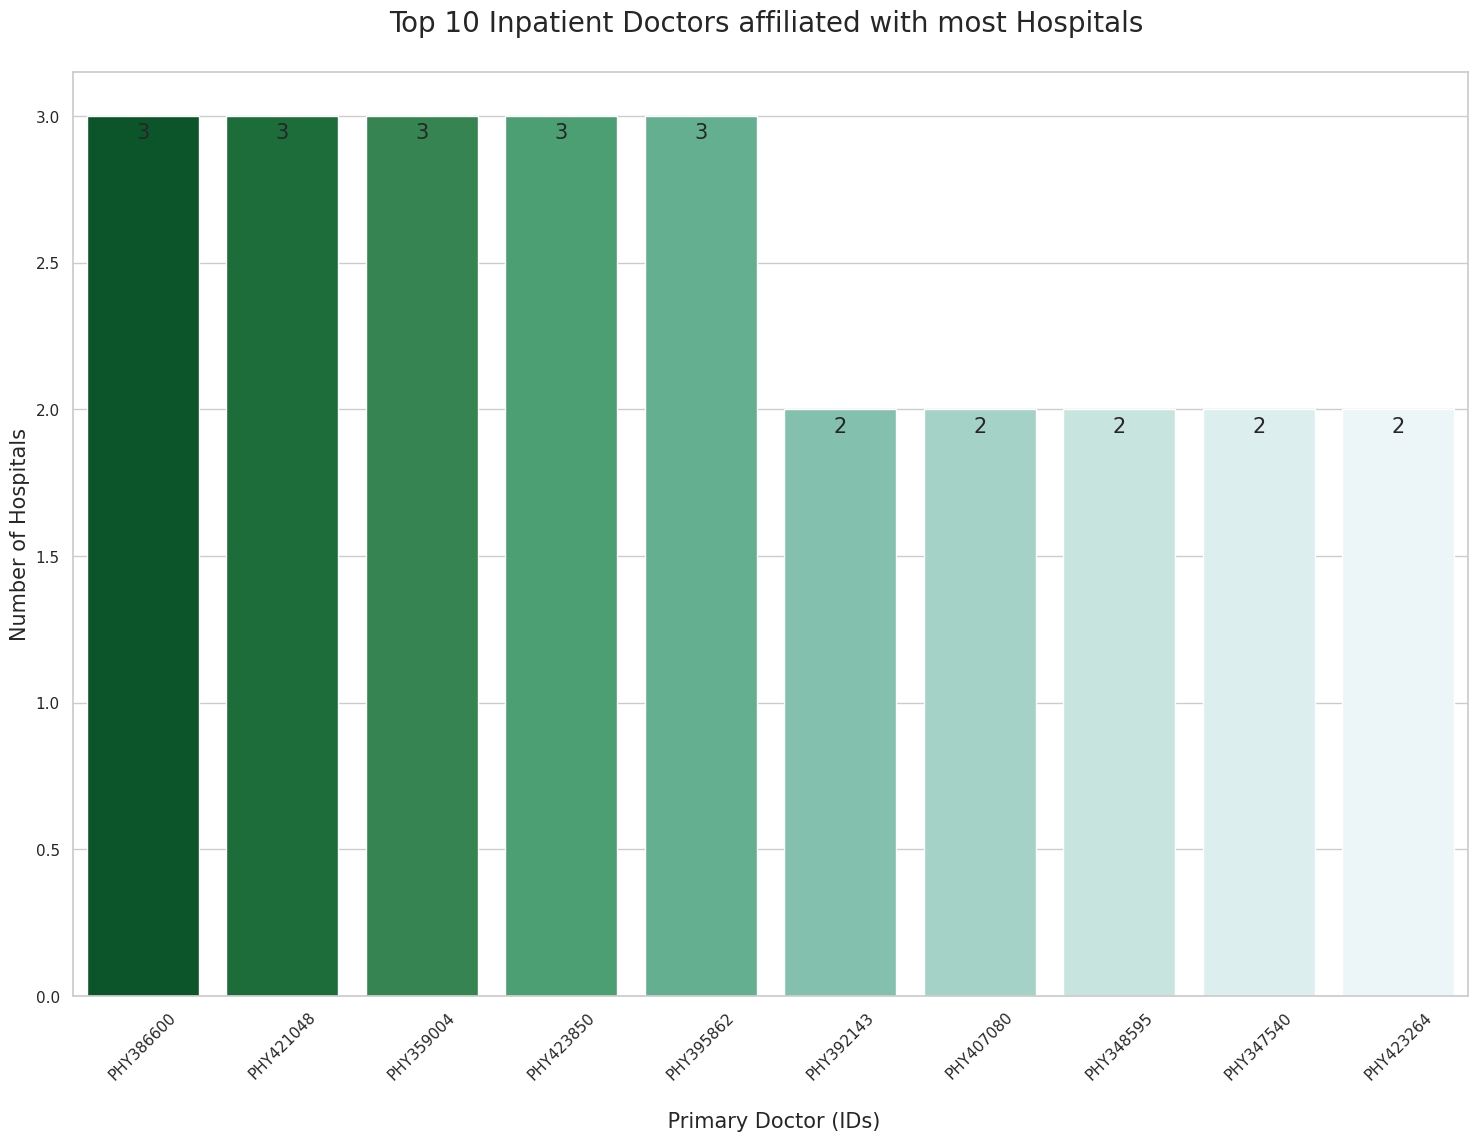

In [100]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_doc_prov.head(10), x='Primary_Doctor', y='Affiliated_Hospitals', palette="BuGn_r")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Number of Hospitals", fontsize = 15)
plt.title("Top 10 Inpatient Doctors affiliated with most Hospitals \n", fontsize = 20)

In [101]:
# Hospitals that outpatient dictors are associated with:

out_doc_prov = train_outpatient[['AttendingPhysician','Provider']].drop_duplicates()
out_doc_prov = pd.DataFrame(out_doc_prov.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
out_doc_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
out_doc_prov.drop(out_doc_prov.index[[0]], inplace=True)
out_doc_prov

,Primary_Doctor,Affiliated_Hospitals
1,PHY365132,8
2,PHY342165,8
3,PHY417254,7
4,PHY429887,6
5,PHY322656,6
...,...,...
74105,PHY353479,1
74106,PHY353477,1
74107,PHY353475,1
74108,PHY353472,1


In [102]:
#Looking at Fraud vs Non Fraud

outpdoc_lst = ['PHY342165', 'PHY365132', 'PHY417254', 'PHY401319', 'PHY340715']
df1 = train_outpatient[train_outpatient.AttendingPhysician.isin(outpdoc_lst)]\
               [['AttendingPhysician','Provider']].drop_duplicates()
df1 = df1.merge(train_y, on='Provider')
df1 = df1.groupby(['AttendingPhysician','PotentialFraud']).agg(['count']).reset_index()
df1.columns=['Primary_Doctor', 'Fraud_labels', 'Hospital_Count']
df1

,Primary_Doctor,Fraud_labels,Hospital_Count
0,PHY340715,No,6
1,PHY342165,No,8
2,PHY365132,No,8
3,PHY401319,No,6
4,PHY417254,No,7


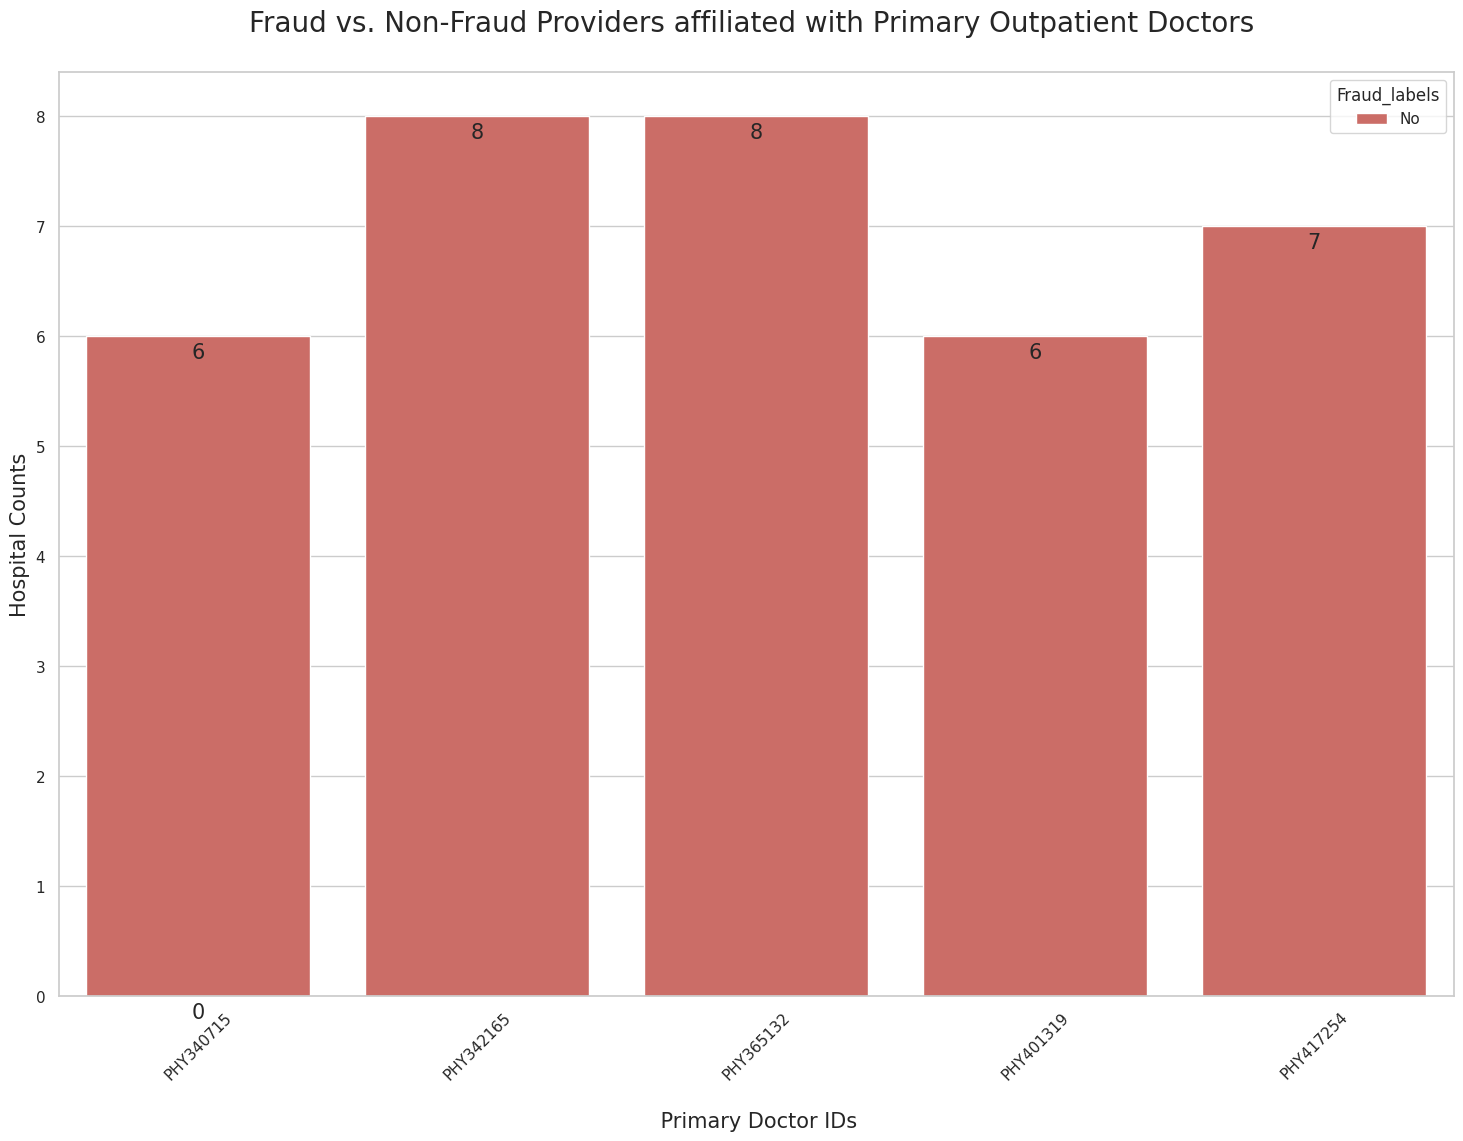

In [103]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Primary_Doctor", y="Hospital_Count", hue="Fraud_labels",\
            data=df1, ci=None, palette='hls')
for p in splot.patches:
    splot.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.xlabel("\n Primary Doctor IDs", fontsize = 15)
plt.ylabel("Hospital Counts", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers affiliated with Primary Outpatient Doctors \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Outpatient Doctors affiliated with most Hospitals \n')

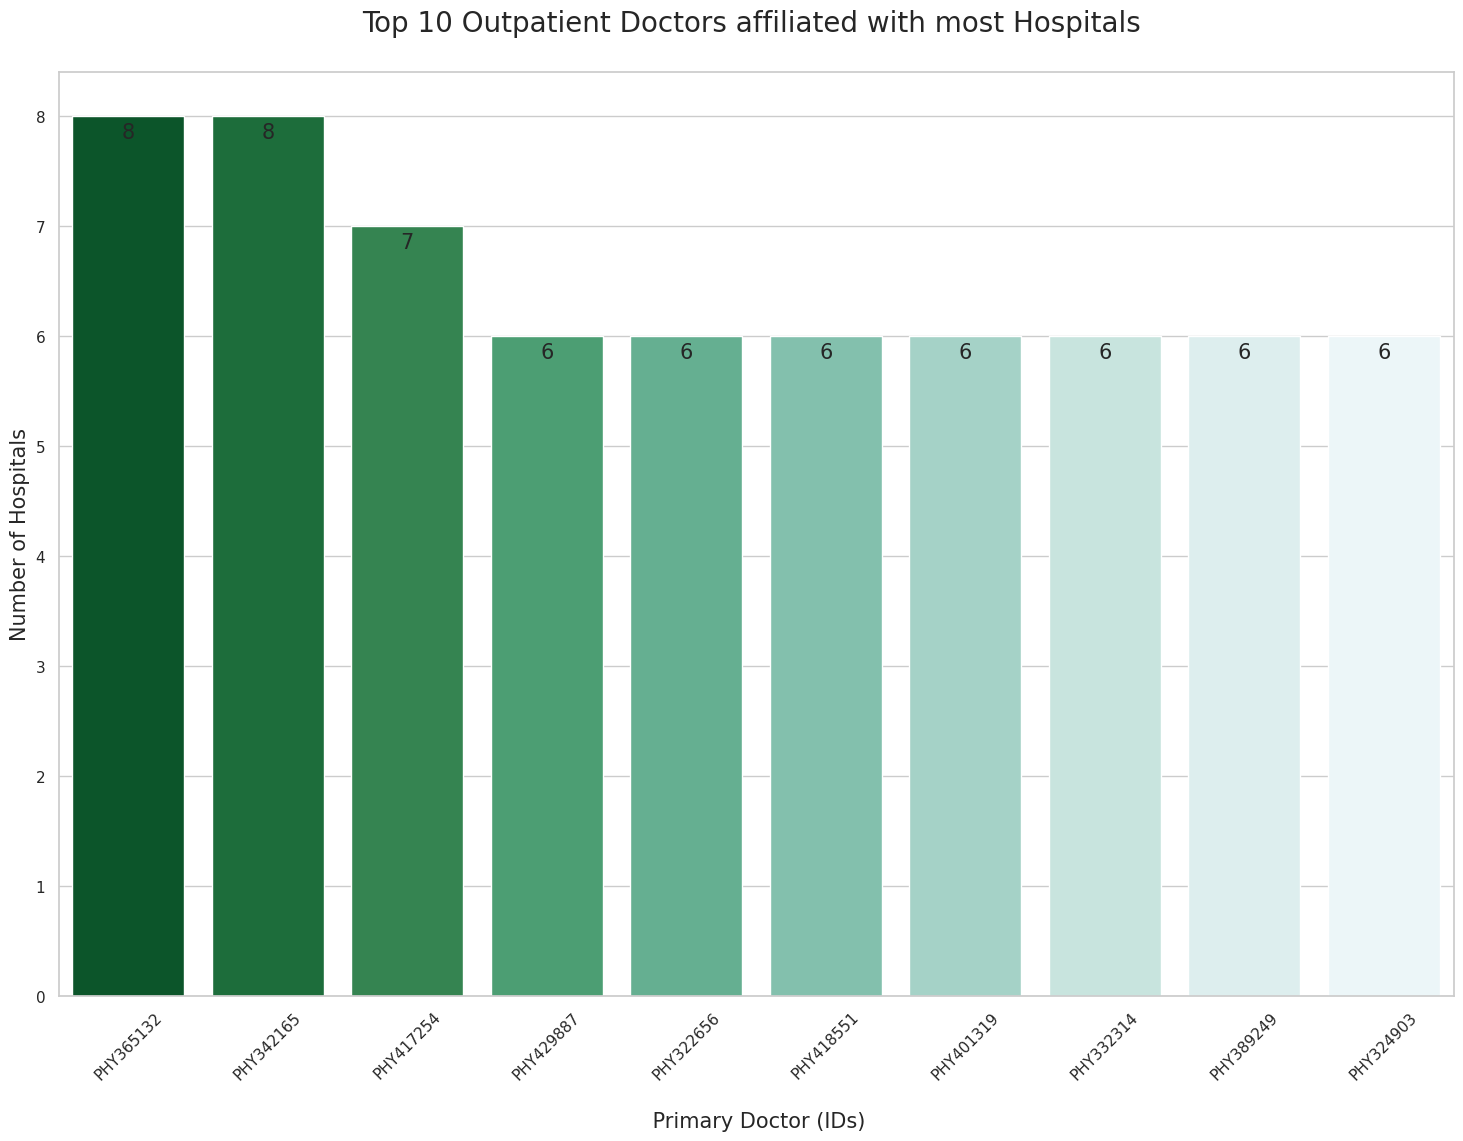

In [104]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_doc_prov.head(10), x='Primary_Doctor', y='Affiliated_Hospitals', palette="BuGn_r")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel("\n Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Number of Hospitals", fontsize = 15)
plt.title("Top 10 Outpatient Doctors affiliated with most Hospitals \n", fontsize = 20)

In [105]:
# Looking at common inpatient/outpatient dictors

common_docs = in_doc_prov.merge(out_doc_prov, on='Primary_Doctor')
common_docs

,Primary_Doctor,Affiliated_Hospitals_x,Affiliated_Hospitals_y
0,PHY359004,3,2
1,PHY348595,2,1
2,PHY423264,2,1
3,PHY387333,2,1
4,PHY396839,2,1
...,...,...,...
3645,PHY351763,1,2
3646,PHY351769,1,1
3647,PHY351921,1,1
3648,PHY351890,1,1


In [106]:
df1 = pd.DataFrame(train_inpatient.groupby(['BeneID', 'Provider'])['ClmDiagnosisCode_1']\
               .value_counts().sort_values(ascending=False))
df1.columns = ['Code_Counts']
# df1 = df1.reset_index()
# df1.columns = ['Beneficiary_ID','Hospital_ID','Diagnosis_Code','Code_Counts']
df1

Code_Counts
BeneID     Provider ClmDiagnosisCode_1             
BENE29013  PRV51951 49121                         3
BENE155047 PRV53762 41401                         2
BENE130337 PRV56748 51881                         2
BENE94796  PRV56592 0389                          2
BENE16852  PRV56560 43491                         2
...                                             ...
BENE145736 PRV55911 42823                         1
BENE14574  PRV53781 49121                         1
                    99681                         1
           PRV54949 82009                         1
BENE145726 PRV53104 51881                         1

[40405 rows x 1 columns]

In [107]:
df2 = pd.DataFrame(train_outpatient.groupby(['BeneID', 'Provider'])['ClmDiagnosisCode_1']\
                .value_counts().sort_values(ascending=False))
df2.columns = ['Code_Counts']
# df2 = df2.reset_index()
# df2.columns = ['Beneficiary_ID','Hospital_ID','Diagnosis_Code','Code_Counts']
df2

Code_Counts
BeneID     Provider ClmDiagnosisCode_1             
BENE31954  PRV55467 5856                          4
BENE57412  PRV52982 V560                          4
BENE115962 PRV51574 4011                          4
BENE19912  PRV53900 V4512                         4
BENE42786  PRV57189 4019                          4
...                                             ...
BENE145630 PRV57356 2722                          1
           PRV52499 42731                         1
BENE14563  PRV54350 V4500                         1
                    9181                          1
BENE145631 PRV53374 7853                          1

[515358 rows x 1 columns]

### Duplicate claims:

In [108]:
# Making df of interest

inp_df = train_inpatient[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                 'DiagnosisGroupCode','ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

inp_df = inp_df.merge(train_y, on='Provider')

# Narrowing down:

inp_df = inp_df.loc[inp_df.PotentialFraud == 'Yes',:]
inp_df = inp_df.loc[inp_df.InscClaimAmtReimbursed > 80000,:]

In [109]:
print(inp_df['BeneID'].duplicated().sum())
print(inp_df['AttendingPhysician'].duplicated().sum())
print(inp_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(inp_df['DiagnosisGroupCode'].duplicated().sum())
print(inp_df['ClmDiagnosisCode_1'].duplicated().sum())
print(inp_df['ClmProcedureCode_1'].duplicated().sum())

0
0
8
3
10
11


In [110]:
# Making df of interest

out_df = train_outpatient[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                           'ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

out_df = out_df.merge(train_y, on='Provider')

# Narrowing down:

out_df = out_df.loc[out_df.PotentialFraud == 'Yes',:]
out_df = out_df.loc[out_df.InscClaimAmtReimbursed > 80000,:]

In [111]:
print(out_df['BeneID'].duplicated().sum())
print(out_df['AttendingPhysician'].duplicated().sum())
print(out_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(out_df['ClmDiagnosisCode_1'].duplicated().sum())
print(out_df['ClmProcedureCode_1'].duplicated().sum())

0
0
1
0
0


## Creating new features for inpatient/outpatient datasets:

- Created Hospital Stay in days feature for each claim from AdmissionDt and DischargeDt

- Created Claim duration in days feature from ClaimStartDt and ClaimEndDt

- Created a feature listing the month and year the beneficiary made claim

- Added a feature calculating insurance covered percentages for each claim

- Added a feature calculating total claim amount

- Count features: Physician Count (for each patient), Provider Count (for each patient) and Claims Count (for each patient)

In [112]:
in_new_feats(train_inpatient)
in_new_feats(test_inpatient)
out_new_feats(train_outpatient)
out_new_feats(test_outpatient)

- Dropping ClaimStartDt, ClaimEndDt, AdmissionDt and DischargeDt columns

In [113]:
train_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)\

test_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)

train_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)\

test_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

- Concatenating inpatient and outpatient datasets (train and test):

In [114]:
train_in_out_df = pd.concat([train_inpatient, train_outpatient],axis=0,ignore_index=True)
test_in_out_df = pd.concat([test_inpatient, test_outpatient],axis=0,ignore_index=True)

- Imputing null values and changing dtype to int for Hospital_stay

In [115]:
# Train data
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].fillna(-1)
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].astype(int)

# Test data
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].fillna(-1)
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].astype(int)

- Label encoding code/ID columns:

In [116]:
inout_label_encode(train_in_out_df)
inout_label_encode(test_in_out_df)

- Merging beneficiary data with in_out train and test data

In [117]:
train_features = train_beneficiary.merge(train_in_out_df, on='BeneID')
test_features = test_beneficiary.merge(test_in_out_df, on='BeneID')

- Adding chronic count (per claim) feature to the complete data

In [118]:
chr_cond_cnt(train_features)
chr_cond_cnt(test_features)

- Merging provider fraud labels with features train data

In [119]:
train_df = train_features.merge(train_y, on='Provider')

## Saving clean files:

In [121]:
train_df.to_csv('clean_train.csv')
test_features.to_csv('clean_test.csv')